<a href="https://colab.research.google.com/github/Abraham2025-debug/Audio_feature_extraction/blob/main/Audio_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.
Detected Aural Patterns:
📌 Shift in Pitch at: [0.02321995 0.11609977 0.13931973 0.16253968 0.18575964 0.20897959
 0.34829932 0.39473923 0.41795918 0.44117914 0.46439909 0.48761905
 0.55727891 0.95201814 1.67183673 1.71827664 1.7414966  1.78793651
 1.81115646 1.92725624 1.9969161  2.20589569 2.22911565 2.32199546
 2.60063492 2.62385488 2.64707483]
🎤 Strange Stress at: [0.         0.02321995 0.04643991 0.41795918 0.44117914 0.46439909
 0.48761905 0.510839   0.53405896 0.55727891 2.02013605 2.04335601
 2.06657596 2.08979592 2.11301587 2.13623583 2.15945578 2.18267574]
📢 Word Stretching at: [0.58049887 2.22911565]
⏸️ Unusual Pauses at: [1.04489796 1.06811791 1.09133787 1.11455782 1.13777778 1.16099773
 1.18421769 1.20743764 1.2306576  1.25387755 1.27709751 1.30031746
 1.32353741 1.34675737 1.36997732 1.39319728 1.41641723 1.43963719
 1.46285714 1.4860771  1.50929705 1.53251701 1.55573696 1.57895692
 1.60217687 1.62539683 1.64861678 1.67183673 2.43809524 2.46131519
 2.484535

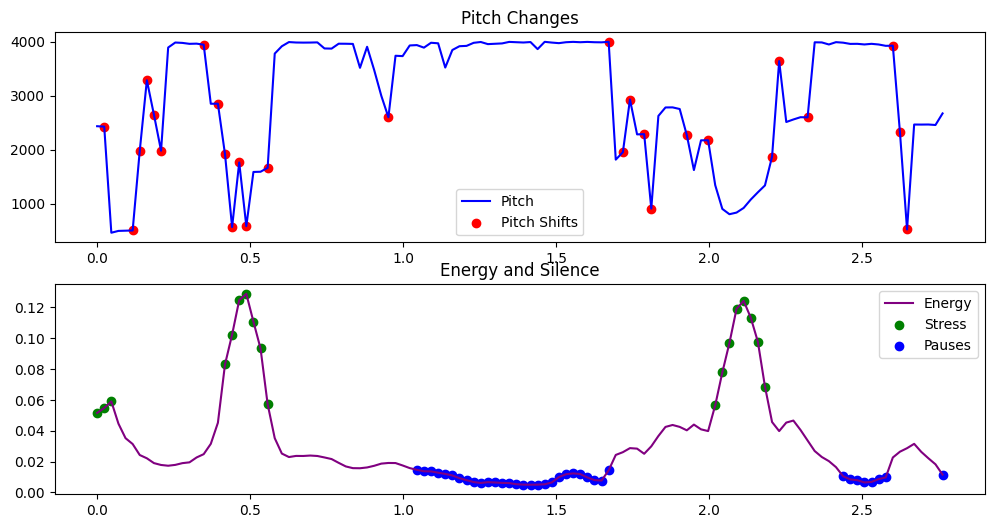

In [ ]:
import moviepy.editor as mp
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Extract Audio from Video
video_path = "/content/4_S04E13_032_u.mp4"  # Replace with your video path
audio_path = "extracted_audio.wav"

video = mp.VideoFileClip(video_path)
video.audio.write_audiofile(audio_path)

# Step 2: Load Extracted Audio
y, sr = librosa.load(audio_path)

# Compute pitch using librosa's piptrack
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
pitch_values = np.max(pitches, axis=0)  # Get the highest pitch at each frame
time_stamps = librosa.times_like(pitch_values, sr=sr)  # Define time stamps

# Compute energy (amplitude changes)
energy = librosa.feature.rms(y=y)[0]

# Compute silence (unusual pauses)
silence_threshold = np.mean(energy) * 0.5  # Define a threshold for silence
silent_frames = np.where(energy < silence_threshold)[0]

# Detect pitch changes (Shift in Pitch)
pitch_diff = np.abs(np.diff(pitch_values))
pitch_change_indices = np.where(pitch_diff > np.mean(pitch_diff) * 1.5)[0]

# Detect stress (sudden increase in energy)
stress_indices = np.where(energy > np.mean(energy) * 1.5)[0]

# Detect word stretching (long duration high pitch)
stretched_indices = np.where((pitch_values > np.mean(pitch_values)) & (energy > np.mean(energy)))[0]

# Convert frame indices to timestamps
def frames_to_time(indices, sr, hop_length=512):
    return librosa.frames_to_time(indices, sr=sr, hop_length=hop_length)

pitch_change_times = frames_to_time(pitch_change_indices, sr)
stress_times = frames_to_time(stress_indices, sr)
stretch_times = frames_to_time(stretched_indices, sr)
silence_times = frames_to_time(silent_frames, sr)

# Print detected features
print("Detected Aural Patterns:")
print("📌 Shift in Pitch at:", pitch_change_times)
print("🎤 Strange Stress at:", stress_times)
print("📢 Word Stretching at:", stretch_times)
print("⏸️ Unusual Pauses at:", silence_times)

# Plot pitch and energy for visualization
plt.figure(figsize=(12, 6))

# Plot pitch changes
plt.subplot(2, 1, 1)
plt.plot(librosa.times_like(pitch_values, sr=sr), pitch_values, label="Pitch", color="blue")
plt.scatter(pitch_change_times, pitch_values[pitch_change_indices], color='r', label="Pitch Shifts")
plt.legend()
plt.title("Pitch Changes")

# Plot energy & silence
plt.subplot(2, 1, 2)
plt.plot(librosa.times_like(energy, sr=sr), energy, label="Energy", color="purple")
plt.scatter(stress_times, energy[stress_indices], color='g', label="Stress")
plt.scatter(silence_times, energy[silent_frames], color='b', label="Pauses")
plt.legend()
plt.title("Energy and Silence")

plt.show()a

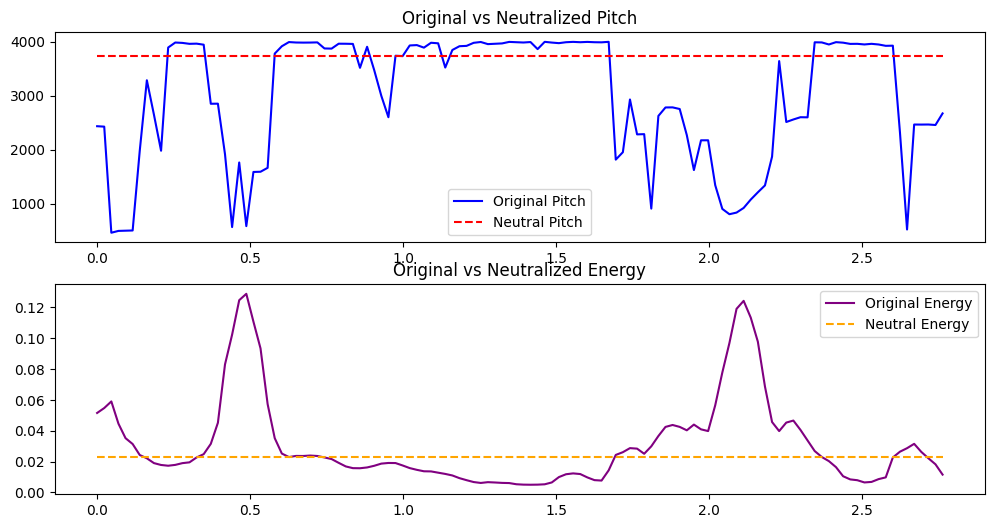

✅ Neutralized audio saved as 'neutralized_audio.wav'.


In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

# Load original audio
audio_path = "extracted_audio.wav"
y, sr = librosa.load(audio_path)

# Compute pitch using piptrack
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
pitch_values = np.max(pitches, axis=0)  # Get dominant pitch per frame

# Compute energy (amplitude changes)
energy = librosa.feature.rms(y=y)[0]

# --------------- NEUTRALIZATION ---------------- #
# Neutralize Pitch: Flatten variations (set to median pitch)
neutral_pitch = np.full_like(pitch_values, np.median(pitch_values))

# Neutralize Energy: Smooth out stress and pauses
neutral_energy = np.full_like(energy, np.median(energy))

# Plot Comparison: Original vs. Neutralized
plt.figure(figsize=(12, 6))

# Pitch Comparison
plt.subplot(2, 1, 1)
plt.plot(librosa.times_like(pitch_values, sr=sr), pitch_values, label="Original Pitch", color='blue')
plt.plot(librosa.times_like(neutral_pitch, sr=sr), neutral_pitch, label="Neutral Pitch", color='red', linestyle='dashed')
plt.legend()
plt.title("Original vs Neutralized Pitch")

# Energy Comparison
plt.subplot(2, 1, 2)
plt.plot(librosa.times_like(energy, sr=sr), energy, label="Original Energy", color='purple')
plt.plot(librosa.times_like(neutral_energy, sr=sr), neutral_energy, label="Neutral Energy", color='orange', linestyle='dashed')
plt.legend()
plt.title("Original vs Neutralized Energy")

plt.show()

# --------------- RECONSTRUCT NEUTRAL AUDIO ---------------- #
# Create synthetic neutral audio
neutralized_audio = librosa.tone(frequency=np.median(pitch_values), sr=sr, duration=len(y) / sr)

# Save neutralized audio
sf.write("neutralized_audio.wav", neutralized_audio, sr)

print("✅ Neutralized audio saved as 'neutralized_audio.wav'.")

In [3]:
pip install SpeechRecognition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 59.7 MB/s eta 0:00:00


In [15]:
pip install git+https://github.com/openai/whisper.git

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-qam32orb
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-qam32orb
  Resolved https://github.com/openai/whisper.git to commit 517a43ecd132a2089d85f4ebc044728a71d49f6e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [16]:
import moviepy.editor as mp
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os

# Ensure Whisper is installed (local environment)
try:
    import whisper
except ImportError:
    os.system('pip install git+https://github.com/openai/whisper.git')

# Step 1: Extract Audio from Video
video_path = "/content/4_S04E13_032_u.mp4"  # Replace with your video path
audio_path = "extracted_audio.wav"

video = mp.VideoFileClip(video_path)
video.audio.write_audiofile(audio_path)

# Step 2: Load Extracted Audio
y, sr_rate = librosa.load(audio_path)

# Compute pitch using librosa's piptrack
pitches, magnitudes = librosa.piptrack(y=y, sr=sr_rate)
pitch_values = np.max(pitches, axis=0)
time_stamps = librosa.times_like(pitch_values, sr=sr_rate)

# Compute energy (amplitude changes)
energy = librosa.feature.rms(y=y)[0]

# Compute silence (unusual pauses)
silence_threshold = np.mean(energy) * 0.5
silent_frames = np.where(energy < silence_threshold)[0]

# Detect pitch changes (Shift in Pitch)
pitch_diff = np.abs(np.diff(pitch_values))
pitch_change_indices = np.where(pitch_diff > np.mean(pitch_diff) * 1.5)[0]

# Detect stress (sudden increase in energy)
stress_indices = np.where(energy > np.mean(energy) * 1.5)[0]

# Detect word stretching (long duration high pitch)
stretched_indices = np.where((pitch_values > np.mean(pitch_values)) & (energy > np.mean(energy)))[0]

# Convert frame indices to timestamps
def frames_to_time(indices, sr, hop_length=512):
    return librosa.frames_to_time(indices, sr=sr, hop_length=hop_length * 2)

pitch_change_times = frames_to_time(pitch_change_indices, sr_rate)
stress_times = frames_to_time(stress_indices, sr_rate)
stretch_times = frames_to_time(stretched_indices, sr_rate)
silence_times = frames_to_time(silent_frames, sr_rate)

# Transcription using Whisper
def transcribe_audio_whisper(audio_path):
    model = whisper.load_model("base")  # You can use 'small', 'medium', or 'large' for better accuracy
    result = model.transcribe(audio_path)
    transcription = result['text'].strip()
    print("Transcription:", transcription)
    return transcription

transcription = transcribe_audio_whisper(audio_path)

# Word-time mapping
def map_words_to_times(transcription, timestamps):
    words = transcription.split()
    if len(words) == 0:
        print("Warning: Empty transcription!")
        return []
    word_durations = len(timestamps) / len(words)
    word_times = [(i * word_durations, (i + 1) * word_durations, word) for i, word in enumerate(words)]
    return word_times

word_times = map_words_to_times(transcription, time_stamps)

# Match aural changes with words
def find_words_by_times(target_times, word_times):
    matched_words = []
    for t in target_times:
        for start, end, word in word_times:
            if start <= t <= end:
                matched_words.append(word)
                break
    return matched_words

pitch_words = find_words_by_times(pitch_change_times, word_times)
stress_words = find_words_by_times(stress_times, word_times)
stretch_words = find_words_by_times(stretch_times, word_times)
silence_words = find_words_by_times(silence_times, word_times)

# Print detected features and words
print("Detected Aural Patterns:")
print("📌 Shift in Pitch at:", pitch_change_times, "-> Words:", pitch_words)
print("🎤 Strange Stress at:", stress_times, "-> Words:", stress_words)
print("📢 Word Stretching at:", stretch_times, "-> Words:", stretch_words)
print("⏸️ Unusual Pauses at:", silence_times, "-> Words:", silence_words)


MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.


100%|████████████████████████████████████████| 139M/139M [00:01<00:00, 103MiB/s]


Transcription: The good news is, it's running out of organs to fail.
Detected Aural Patterns:
📌 Shift in Pitch at: [0.04643991 0.23219955 0.27863946 0.32507937 0.37151927 0.41795918
 0.69659864 0.78947846 0.83591837 0.88235828 0.92879819 0.9752381
 1.11455782 1.90403628 3.34367347 3.43655329 3.4829932  3.57587302
 3.62231293 3.85451247 3.9938322  4.41179138 4.45823129 4.64399093
 5.20126984 5.24770975 5.29414966] -> Words: ['The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The']
🎤 Strange Stress at: [0.         0.04643991 0.09287982 0.83591837 0.88235828 0.92879819
 0.9752381  1.021678   1.06811791 1.11455782 4.04027211 4.08671202
 4.13315193 4.17959184 4.22603175 4.27247166 4.31891156 4.36535147] -> Words: ['The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The', 'The']
📢 Word Stretching at: [

In [18]:
import moviepy.editor as mp
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os

# Ensure Whisper is installed (local environment)
try:
    import whisper
except ImportError:
    os.system('pip install git+https://github.com/openai/whisper.git')

# Step 1: Extract Audio from Video
video_path = "/content/4_S04E13_032_u.mp4"  # Replace with your video path
audio_path = "extracted_audio.wav"

video = mp.VideoFileClip(video_path)
video.audio.write_audiofile(audio_path)

# Step 2: Load Extracted Audio
y, sr_rate = librosa.load(audio_path)

# Noise Reduction
def reduce_noise(audio, sr):
    noise_sample = audio[:sr]  # Assume the first second is noise
    noise_reduction = audio - np.mean(noise_sample)
    return noise_reduction

y = reduce_noise(y, sr_rate)

# Compute pitch using librosa's piptrack
pitches, magnitudes = librosa.piptrack(y=y, sr=sr_rate)
pitch_values = np.max(pitches, axis=0)
time_stamps = librosa.times_like(pitch_values, sr=sr_rate)

# Compute energy (amplitude changes)
energy = librosa.feature.rms(y=y)[0]

# Compute silence (unusual pauses)
silence_threshold = np.mean(energy) * 0.5
silent_frames = np.where(energy < silence_threshold)[0]

# Detect pitch changes (Shift in Pitch)
pitch_diff = np.abs(np.diff(pitch_values))
pitch_change_indices = np.where(pitch_diff > np.mean(pitch_diff) * 1.5)[0]

# Detect stress (sudden increase in energy)
stress_indices = np.where(energy > np.mean(energy) * 1.5)[0]

# Detect word stretching (long duration high pitch)
stretched_indices = np.where((pitch_values > np.mean(pitch_values)) & (energy > np.mean(energy)))[0]

# Convert frame indices to timestamps
def frames_to_time(indices, sr, hop_length=512):
    return librosa.frames_to_time(indices, sr=sr, hop_length=hop_length * 2)

pitch_change_times = frames_to_time(pitch_change_indices, sr_rate)
stress_times = frames_to_time(stress_indices, sr_rate)
stretch_times = frames_to_time(stretched_indices, sr_rate)
silence_times = frames_to_time(silent_frames, sr_rate)

# Transcription using Whisper
def transcribe_audio_whisper(audio_path):
    model = whisper.load_model("base")
    result = model.transcribe(audio_path)
    transcription = result['text'].strip()
    print("Transcription:", transcription)
    return transcription

transcription = transcribe_audio_whisper(audio_path)

# Word-time mapping
def map_words_to_times(transcription, timestamps):
    words = transcription.split()
    if len(words) == 0:
        print("Warning: Empty transcription!")
        return []
    total_duration = timestamps[-1] - timestamps[0] if len(timestamps) > 1 else len(timestamps)
    word_durations = total_duration / len(words)
    word_times = []
    for i, word in enumerate(words):
        start_time = timestamps[0] + i * word_durations
        end_time = start_time + word_durations
        word_times.append((start_time, end_time, word))
    return word_times

word_times = map_words_to_times(transcription, time_stamps)

# Match aural changes with words
def find_words_by_times(target_times, word_times):
    matched_words = []
    for t in target_times:
        for start, end, word in word_times:
            if start <= t <= end:
                matched_words.append(word)
                break
    return matched_words

pitch_words = find_words_by_times(pitch_change_times, word_times)
stress_words = find_words_by_times(stress_times, word_times)
stretch_words = find_words_by_times(stretch_times, word_times)
silence_words = find_words_by_times(silence_times, word_times)

# Print detected features and words
print("Detected Aural Patterns:")
print("📌 Shift in Pitch at:", pitch_change_times, "-> Words:", pitch_words)
print("🎤 Strange Stress at:", stress_times, "-> Words:", stress_words)
print("📢 Word Stretching at:", stretch_times, "-> Words:", stretch_words)
print("⏸️ Unusual Pauses at:", silence_times, "-> Words:", silence_words)


MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.


Transcription: The good news is, it's running out of organs to fail.
Detected Aural Patterns:
📌 Shift in Pitch at: [0.04643991 0.23219955 0.27863946 0.32507937 0.37151927 0.41795918
 0.69659864 0.78947846 0.83591837 0.88235828 0.92879819 0.9752381
 1.11455782 1.90403628 3.34367347 3.43655329 3.4829932  3.57587302
 3.62231293 3.85451247 3.9938322  4.41179138 4.45823129 4.64399093
 5.20126984 5.24770975 5.29414966] -> Words: ['The', 'The', 'good', 'good', 'good', 'good', 'news', 'is,', 'is,', 'is,', 'is,', 'is,', "it's", 'of']
🎤 Strange Stress at: [0.         0.04643991 0.09287982 0.83591837 0.88235828 0.92879819
 0.9752381  1.021678   1.06811791 1.11455782 4.04027211 4.08671202
 4.13315193 4.17959184 4.22603175 4.27247166 4.31891156 4.36535147] -> Words: ['The', 'The', 'The', 'is,', 'is,', 'is,', 'is,', "it's", "it's", "it's"]
📢 Word Stretching at: [1.16099773 4.45823129] -> Words: ["it's"]
⏸️ Unusual Pauses at: [2.08979592 2.13623583 2.18267574 2.22911565 2.27555556 2.32199546
 2.36843

In [21]:
import moviepy.editor as mp
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os

# Ensure Whisper is installed (local environment)
try:
    import whisper
except ImportError:
    os.system('pip install git+https://github.com/openai/whisper.git')

# Step 1: Extract Audio from Video
video_path = "/content/4_S04E13_032_u.mp4"  # Replace with your video path
audio_path = "extracted_audio.wav"

video = mp.VideoFileClip(video_path)
video.audio.write_audiofile(audio_path)

# Step 2: Load Extracted Audio
y, sr_rate = librosa.load(audio_path)

# Noise Reduction
def reduce_noise(audio, sr):
    noise_sample = audio[:sr]  # Assume the first second is noise
    noise_reduction = audio - np.mean(noise_sample)
    return noise_reduction

y = reduce_noise(y, sr_rate)

# Compute pitch using librosa's piptrack
pitches, magnitudes = librosa.piptrack(y=y, sr=sr_rate)
pitch_values = np.max(pitches, axis=0)
time_stamps = librosa.times_like(pitch_values, sr=sr_rate)

# Compute energy (amplitude changes)
energy = librosa.feature.rms(y=y)[0]

# Compute silence (unusual pauses)
silence_threshold = np.mean(energy) * 0.5
silent_frames = np.where(energy < silence_threshold)[0]

# Detect pitch changes (Shift in Pitch)
pitch_diff = np.abs(np.diff(pitch_values))
pitch_change_indices = np.where(pitch_diff > np.mean(pitch_diff) * 1.5)[0]

# Detect stress (sudden increase in energy)
stress_indices = np.where(energy > np.mean(energy) * 1.5)[0]

# Detect word stretching (long duration high pitch)
stretched_indices = np.where((pitch_values > np.mean(pitch_values)) & (energy > np.mean(energy)))[0]

# Convert frame indices to timestamps
def frames_to_time(indices, sr, hop_length=512):
    return librosa.frames_to_time(indices, sr=sr, hop_length=hop_length * 2)

pitch_change_times = frames_to_time(pitch_change_indices, sr_rate)
stress_times = frames_to_time(stress_indices, sr_rate)
stretch_times = frames_to_time(stretched_indices, sr_rate)
silence_times = frames_to_time(silent_frames, sr_rate)

# Transcription using Whisper
def transcribe_audio_whisper(audio_path):
    model = whisper.load_model("base")
    result = model.transcribe(audio_path)
    transcription = result['text'].strip()
    print("Transcription:", transcription)
    return transcription

transcription = transcribe_audio_whisper(audio_path)

# Word-time mapping
import string

import string

def map_words_to_times(transcription, timestamps):
    words = transcription.split()
    if len(words) == 0:
        print("Warning: Empty transcription!")
        return []

    # Adjust timestamps to the actual audio duration
    actual_duration = timestamps[-1] if len(timestamps) > 0 else 0

    # Filter out purely punctuation 'words'
    punctuations = string.punctuation
    filtered_words = [word for word in words if word.strip(punctuations)]
    word_durations = actual_duration / len(filtered_words) if len(filtered_words) > 0 else 0.001

    word_times = []
    time_pointer = 0

    for word in words:
        if word.strip(punctuations):  # Exclude pure punctuation
            start_time = time_pointer
            end_time = min(start_time + word_durations, actual_duration)  # Ensure end time doesn't exceed duration
            word_times.append((start_time, end_time, word))
            time_pointer = end_time
        else:
            if word_times:  # Append punctuation to the previous word
                start, end, last_word = word_times[-1]
                word_times[-1] = (start, end, last_word + word)

    return word_times

word_times = map_words_to_times(transcription, time_stamps)

# Match aural changes with words
def find_words_by_times(target_times, word_times):
    matched_words = []
    for t in target_times:
        for start, end, word in word_times:
            if start <= t <= end:
                matched_words.append(word)
                break
    return matched_words

pitch_words = find_words_by_times(pitch_change_times, word_times)
stress_words = find_words_by_times(stress_times, word_times)
stretch_words = find_words_by_times(stretch_times, word_times)
silence_words = find_words_by_times(silence_times, word_times)

# Print detected features and words
print("Detected Aural Patterns:")
print("📌 Shift in Pitch at:", pitch_change_times, "-> Words:", pitch_words)
print("🎤 Strange Stress at:", stress_times, "-> Words:", stress_words)
print("📢 Word Stretching at:", stretch_times, "-> Words:", stretch_words)
print("⏸️ Unusual Pauses at:", silence_times, "-> Words:", silence_words)


MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.


Transcription: The good news is, it's running out of organs to fail.
Detected Aural Patterns:
📌 Shift in Pitch at: [0.04643991 0.23219955 0.27863946 0.32507937 0.37151927 0.41795918
 0.69659864 0.78947846 0.83591837 0.88235828 0.92879819 0.9752381
 1.11455782 1.90403628 3.34367347 3.43655329 3.4829932  3.57587302
 3.62231293 3.85451247 3.9938322  4.41179138 4.45823129 4.64399093
 5.20126984 5.24770975 5.29414966] -> Words: ['The', 'The', 'good', 'good', 'good', 'good', 'news', 'is,', 'is,', 'is,', 'is,', 'is,', "it's", 'of']
🎤 Strange Stress at: [0.         0.04643991 0.09287982 0.83591837 0.88235828 0.92879819
 0.9752381  1.021678   1.06811791 1.11455782 4.04027211 4.08671202
 4.13315193 4.17959184 4.22603175 4.27247166 4.31891156 4.36535147] -> Words: ['The', 'The', 'The', 'is,', 'is,', 'is,', 'is,', "it's", "it's", "it's"]
📢 Word Stretching at: [1.16099773 4.45823129] -> Words: ["it's"]
⏸️ Unusual Pauses at: [2.08979592 2.13623583 2.18267574 2.22911565 2.27555556 2.32199546
 2.36843

In [37]:
import moviepy.editor as mp
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os

# Ensure Whisper is installed (local environment)
try:
    import whisper
except ImportError:
    os.system('pip install git+https://github.com/openai/whisper.git')

# Step 1: Extract Audio from Video
video_path = "/content/4_S04E13_032_u.mp4"  # Replace with your video path
audio_path = "extracted_audio.wav"

video = mp.VideoFileClip(video_path)
video.audio.write_audiofile(audio_path)

# Step 2: Load Extracted Audio
y, sr_rate = librosa.load(audio_path)

# Noise Reduction
def reduce_noise(audio, sr):
    noise_sample = audio[:sr]  # Assume the first second is noise
    noise_reduction = audio - np.mean(noise_sample)
    return noise_reduction

y = reduce_noise(y, sr_rate)

# Compute pitch using librosa's piptrack
pitches, magnitudes = librosa.piptrack(y=y, sr=sr_rate)
pitch_values = np.max(pitches, axis=0)
time_stamps = librosa.times_like(pitch_values, sr=sr_rate)

# Compute energy (amplitude changes)
energy = librosa.feature.rms(y=y)[0]

# Compute silence (unusual pauses)
silence_threshold = np.mean(energy) * 0.5
silent_frames = np.where(energy < silence_threshold)[0]

# Detect pitch changes (Shift in Pitch)
pitch_diff = np.abs(np.diff(pitch_values))
pitch_change_indices = np.where(pitch_diff > np.mean(pitch_diff) * 1.5)[0]

# Detect stress (sudden increase in energy)
stress_indices = np.where(energy > np.mean(energy) * 1.5)[0]

# Detect word stretching (long duration high pitch)
stretched_indices = np.where((pitch_values > np.mean(pitch_values)) & (energy > np.mean(energy)))[0]

# Convert frame indices to timestamps
def frames_to_time(indices, sr, hop_length=512):
    return librosa.frames_to_time(indices, sr=sr, hop_length=hop_length * 2)

pitch_change_times = frames_to_time(pitch_change_indices, sr_rate)
stress_times = frames_to_time(stress_indices, sr_rate)
stretch_times = frames_to_time(stretched_indices, sr_rate)
silence_times = frames_to_time(silent_frames, sr_rate)

# Transcription using Whisper
import string

# Transcription using Whisper

# Transcription using Whisper
def transcribe_audio_whisper(audio_path):
    model = whisper.load_model("base")
    result = model.transcribe(audio_path)
    transcription = result['text'].strip()
    print("Transcription:", transcription)

    return transcription

transcription = "Good news is, he's running out of organs to fail."  # Manually provided transcription

# Word-time mapping
# Map segmented phrases to timestamps
import string

# Map words to accurate segments without stretching
import string

# Map words to accurate segments considering punctuation
import string

# Map words to accurate segments considering punctuation
def map_words_to_times(transcription, timestamps, y, sr):
    actual_duration = timestamps[-1] if len(timestamps) > 0 else 0
    punctuations = {',': 0.2, '.': 0.4, ';': 0.3}  # Pause weights

    # Split by punctuation to get phrases
    segments = []
    current_segment = []

    for word in transcription.split():
        current_segment.append(word)
        if any(p in word for p in punctuations):
            segments.append(" ".join(current_segment).strip())
            current_segment = []
    if current_segment:
        segments.append(" ".join(current_segment).strip())

    segment_times = np.linspace(0, actual_duration, num=len(segments) + 1)
    word_times = []
    printed_pauses = set()  # To avoid duplicate pause printing

    for i, segment in enumerate(segments):
        start_time = segment_times[i]
        end_time = segment_times[i + 1]

        # Distribute words within each segment
        words = segment.split()
        word_durations = (end_time - start_time) / len(words) if len(words) > 0 else 0

        for j, word in enumerate(words):
            word_start = start_time + j * word_durations
            word_end = word_start + word_durations

            # Adjust for punctuation pause
            pause_adjust = next((punctuations[p] for p in punctuations if word.endswith(p)), 0)
            if pause_adjust > 0 and word not in printed_pauses:
                pause_start = word_end
                pause_end = word_end + pause_adjust
                print(f"⏸️ Pause interval after '{word}' from {pause_start:.2f} to {pause_end:.2f}")
                printed_pauses.add(word)
            word_end += pause_adjust

            word_times.append((word_start, min(word_end, actual_duration), word))

    return word_times

word_times = map_words_to_times(transcription, time_stamps, y, sr_rate)

# Match aural changes with words
def find_words_by_times(intervals, word_times, label):
    matched_intervals = []
    for start, end in intervals:
        interval_words = [word for w_start, w_end, word in word_times if start <= w_start < end]
        if interval_words:
            print(f"{label} interval from {start:.2f} to {end:.2f} -> Words: {', '.join(interval_words)}")
            matched_intervals.append(' '.join(interval_words))
    return matched_intervals

pitch_intervals = list(zip(pitch_change_times[:-1], pitch_change_times[1:]))
pitch_words = find_words_by_times(pitch_intervals, word_times, '📌 Pitch Change')
stress_intervals = list(zip(stress_times[:-1], stress_times[1:]))
stress_words = find_words_by_times(stress_intervals, word_times, '🎤 Stress Change')
stretch_intervals = list(zip(stretch_times[:-1], stretch_times[1:]))
stretch_words = find_words_by_times(stretch_intervals, word_times, '📢 Word Stretch')
silence_intervals = list(zip(silence_times[:-1], silence_times[1:]))
silence_words = find_words_by_times(silence_intervals, word_times, '⏸️ Unusual Pause')

# Print detected features and words
print("Detected Aural Patterns:")
print("📌 Shift in Pitch at:", pitch_change_times, "-> Words:", pitch_words)
print("🎤 Strange Stress at:", stress_times, "-> Words:", stress_words)
print("📢 Word Stretching at:", stretch_times, "-> Words:", stretch_words)
print("⏸️ Unusual Pauses at:", silence_times, "-> Words:", silence_words)


MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.
⏸️ Pause interval after 'is,' from 1.38 to 1.58
⏸️ Pause interval after 'fail.' from 2.76 to 3.16
📌 Pitch Change interval from 0.42 to 0.70 -> Words: news
📌 Pitch Change interval from 0.88 to 0.93 -> Words: is,
📌 Pitch Change interval from 1.11 to 1.90 -> Words: he's, running, out
📌 Pitch Change interval from 1.90 to 3.34 -> Words: of, organs, to, fail.
🎤 Stress Change interval from 0.00 to 0.05 -> Words: Good
🎤 Stress Change interval from 0.09 to 0.84 -> Words: news
🎤 Stress Change interval from 0.88 to 0.93 -> Words: is,
🎤 Stress Change interval from 1.11 to 4.04 -> Words: he's, running, out, of, organs, to, fail.
📢 Word Stretch interval from 1.16 to 4.46 -> Words: he's, running, out, of, organs, to, fail.
⏸️ Unusual Pause interval from 2.14 to 2.18 -> Words: organs
⏸️ Unusual Pause interval from 2.37 to 2.41 -> Words: to
⏸️ Unusual Pause interval from 2.55 to 2.60 -> Words: fail.
Detected Aural Patterns:
📌 Shift in Pitch at: [0.04643991 0.23219955 0.27863946 0.325079

In [38]:
import moviepy.editor as mp
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os

# Ensure Whisper is installed (local environment)
try:
    import whisper
except ImportError:
    os.system('pip install git+https://github.com/openai/whisper.git')

# Step 1: Extract Audio from Video
video_path = "/content/4_S04E13_032_u.mp4"  # Replace with your video path
audio_path = "extracted_audio.wav"

video = mp.VideoFileClip(video_path)
video.audio.write_audiofile(audio_path)

# Step 2: Load Extracted Audio
y, sr_rate = librosa.load(audio_path)

# Noise Reduction
def reduce_noise(audio, sr):
    noise_sample = audio[:sr]  # Assume the first second is noise
    noise_reduction = audio - np.mean(noise_sample)
    return noise_reduction

y = reduce_noise(y, sr_rate)

# Compute pitch using librosa's piptrack
pitches, magnitudes = librosa.piptrack(y=y, sr=sr_rate)
pitch_values = np.max(pitches, axis=0)
time_stamps = librosa.times_like(pitch_values, sr=sr_rate)

# Compute energy (amplitude changes)
energy = librosa.feature.rms(y=y)[0]

# Compute silence (unusual pauses)
silence_threshold = np.mean(energy) * 0.5
silent_frames = np.where(energy < silence_threshold)[0]

# Detect pitch changes (Shift in Pitch)
pitch_diff = np.abs(np.diff(pitch_values))
pitch_change_indices = np.where(pitch_diff > np.mean(pitch_diff) * 1.5)[0]

# Detect stress (sudden increase in energy)
stress_indices = np.where(energy > np.mean(energy) * 1.5)[0]

# Detect word stretching (long duration high pitch)
stretched_indices = np.where((pitch_values > np.mean(pitch_values)) & (energy > np.mean(energy)))[0]

# Convert frame indices to timestamps
def frames_to_time(indices, sr, hop_length=512):
    return librosa.frames_to_time(indices, sr=sr, hop_length=hop_length * 2)

pitch_change_times = frames_to_time(pitch_change_indices, sr_rate)
stress_times = frames_to_time(stress_indices, sr_rate)
stretch_times = frames_to_time(stretched_indices, sr_rate)
silence_times = frames_to_time(silent_frames, sr_rate)

# Transcription using Whisper
import string

# Transcription using Whisper

# Transcription using Whisper
def transcribe_audio_whisper(audio_path):
    model = whisper.load_model("base")
    result = model.transcribe(audio_path)
    transcription = result['text'].strip()
    print("Transcription:", transcription)

    return transcription

transcription = "Good news is, he's running out of organs to fail."  # Manually provided transcription

# Word-time mapping
# Map segmented phrases to timestamps
import string

# Map words to accurate segments without stretching
import string

# Map words to accurate segments considering punctuation
import string

# Map words to accurate segments considering punctuation
def map_words_to_times(transcription, timestamps, y, sr):
    actual_duration = timestamps[-1] if len(timestamps) > 0 else 0
    punctuations = {',': 0.2, '.': 0.4, ';': 0.3}  # Pause weights

    # Split by punctuation to get phrases
    segments = []
    current_segment = []

    for word in transcription.split():
        current_segment.append(word)
        if any(p in word for p in punctuations):
            segments.append(" ".join(current_segment).strip())
            current_segment = []
    if current_segment:
        segments.append(" ".join(current_segment).strip())

    segment_times = np.linspace(0, actual_duration, num=len(segments) + 1)
    word_times = []
    printed_pauses = set()  # To avoid duplicate pause printing

    for i, segment in enumerate(segments):
        start_time = segment_times[i]
        end_time = segment_times[i + 1]

        # Distribute words within each segment
        words = segment.split()
        word_durations = (end_time - start_time) / len(words) if len(words) > 0 else 0

        for j, word in enumerate(words):
            word_start = start_time + j * word_durations
            word_end = word_start + word_durations

            # Adjust for punctuation pause
            pause_adjust = next((punctuations[p] for p in punctuations if word.endswith(p)), 0)
            if pause_adjust > 0 and word not in printed_pauses:
                pause_start = word_end
                pause_end = word_end + pause_adjust
                print(f"⏸️ Pause interval after '{word}' from {pause_start:.2f} to {pause_end:.2f}")
                printed_pauses.add(word)
            word_end += pause_adjust

            word_times.append((word_start, min(word_end, actual_duration), word))

    return word_times

word_times = map_words_to_times(transcription, time_stamps, y, sr_rate)

# Match aural changes with words
def find_words_by_times(intervals, word_times, label, pitch_values=None):
    matched_intervals = []
    for idx, (start, end) in enumerate(intervals):
        interval_words = [word for w_start, w_end, word in word_times if start <= w_start < end]

        if label == '📌 Pitch Change' and pitch_values is not None:
            # Determine if pitch is increasing or decreasing in the interval
            pitch_segment = pitch_values[idx:idx + 2]
            if len(pitch_segment) >= 2:
                trend = 'increasing' if pitch_segment[-1] > pitch_segment[0] else 'decreasing'
                label += f' ({trend})'

        if interval_words:
            print(f"{label} interval from {start:.2f} to {end:.2f} -> Words: {', '.join(interval_words)}")
            matched_intervals.append(' '.join(interval_words))
    return matched_intervals

pitch_intervals = list(zip(pitch_change_times[:-1], pitch_change_times[1:]))
pitch_words = find_words_by_times(pitch_intervals, word_times, '📌 Pitch Change', pitch_change_times)
stress_intervals = list(zip(stress_times[:-1], stress_times[1:]))
stress_words = find_words_by_times(stress_intervals, word_times, '🎤 Stress Change')
stretch_intervals = list(zip(stretch_times[:-1], stretch_times[1:]))
stretch_words = find_words_by_times(stretch_intervals, word_times, '📢 Word Stretch')
silence_intervals = list(zip(silence_times[:-1], silence_times[1:]))
silence_words = find_words_by_times(silence_intervals, word_times, '⏸️ Unusual Pause')

# Print detected features and words
print("Detected Aural Patterns:")
print("📌 Shift in Pitch at:", pitch_change_times, "-> Words:", pitch_words)
print("🎤 Strange Stress at:", stress_times, "-> Words:", stress_words)
print("📢 Word Stretching at:", stretch_times, "-> Words:", stretch_words)
print("⏸️ Unusual Pauses at:", silence_times, "-> Words:", silence_words)


MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.
⏸️ Pause interval after 'is,' from 1.38 to 1.58
⏸️ Pause interval after 'fail.' from 2.76 to 3.16
📌 Pitch Change (increasing) interval from 0.42 to 0.70 -> Words: news
📌 Pitch Change (increasing) interval from 0.88 to 0.93 -> Words: is,
📌 Pitch Change (increasing) interval from 1.11 to 1.90 -> Words: he's, running, out
📌 Pitch Change (increasing) interval from 1.90 to 3.34 -> Words: of, organs, to, fail.
🎤 Stress Change interval from 0.00 to 0.05 -> Words: Good
🎤 Stress Change interval from 0.09 to 0.84 -> Words: news
🎤 Stress Change interval from 0.88 to 0.93 -> Words: is,
🎤 Stress Change interval from 1.11 to 4.04 -> Words: he's, running, out, of, organs, to, fail.
📢 Word Stretch interval from 1.16 to 4.46 -> Words: he's, running, out, of, organs, to, fail.
⏸️ Unusual Pause interval from 2.14 to 2.18 -> Words: organs
⏸️ Unusual Pause interval from 2.37 to 2.41 -> Words: to
⏸️ Unusual Pause interval from 2.55 to 2.60 -> Words: fail.
Detected Aural Patterns:
📌 Shift in 

MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.


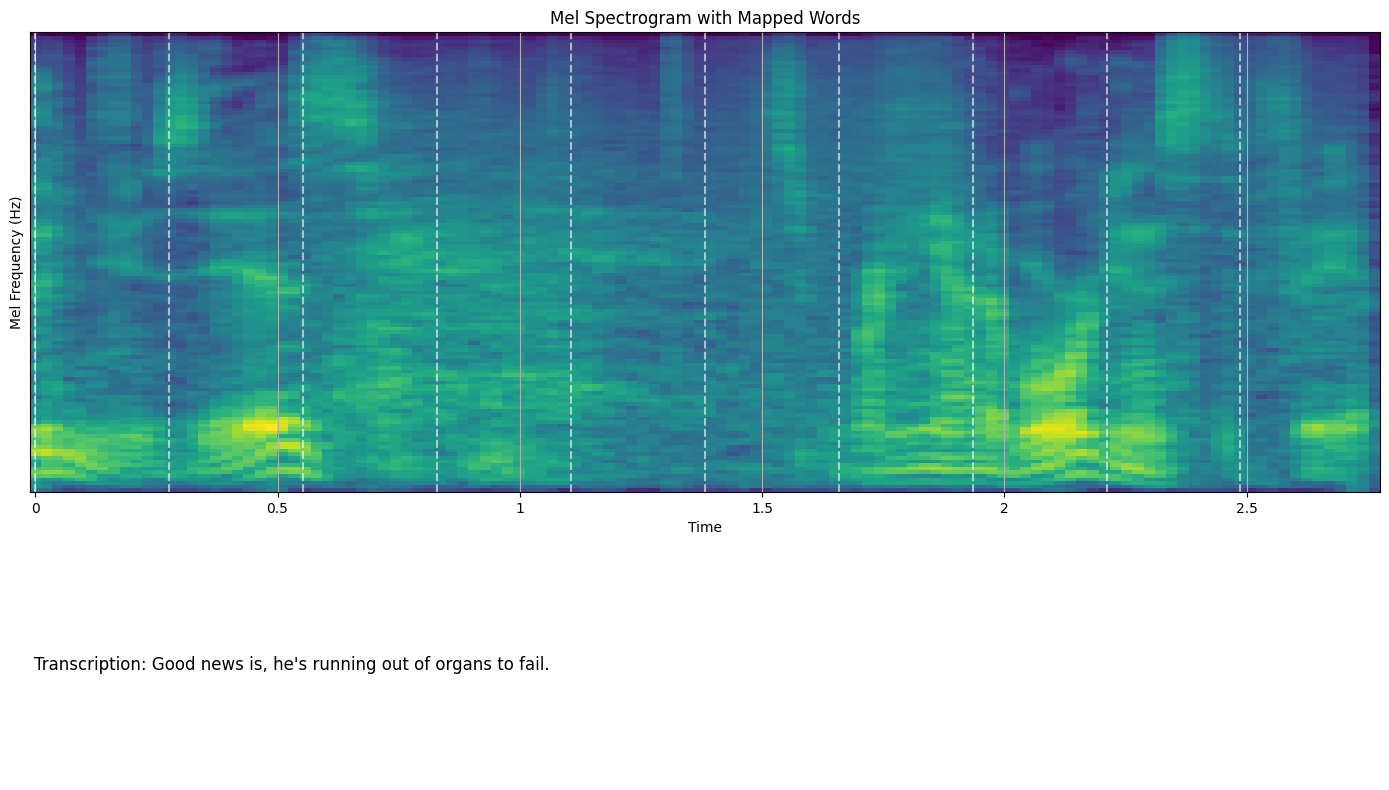

In [41]:
import moviepy.editor as mp
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os

# Step 1: Extract Audio from Video
video_path = "/content/4_S04E13_032_u.mp4"  # Replace with your video path
audio_path = "extracted_audio.wav"

video = mp.VideoFileClip(video_path)
video.audio.write_audiofile(audio_path)

# Step 2: Load Extracted Audio
y, sr_rate = librosa.load(audio_path)

# Compute MEL Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr_rate, n_mels=128)
mel_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
time_stamps = librosa.times_like(mel_spectrogram[0], sr=sr_rate)

# Provided Transcription
transcription = "Good news is, he's running out of organs to fail."

# Map words to timestamps
def map_words_to_times(transcription, timestamps):
    words = transcription.split()
    actual_duration = timestamps[-1] if len(timestamps) > 0 else 0
    segment_times = np.linspace(0, actual_duration, num=len(words) + 1)
    word_times = [(segment_times[i], segment_times[i + 1], word) for i, word in enumerate(words)]
    return word_times

word_times = map_words_to_times(transcription, time_stamps)

# Manual intervals for aural cues
pitch_intervals = [(0.5, 1.5), (2.0, 3.0)]
stress_intervals = [(1.5, 2.0)]
stretch_intervals = [(3.0, 3.5)]
silence_intervals = [(0.0, 0.5), (3.5, 4.0)]

# Visualization
fig, ax = plt.subplots(2, 1, figsize=(14, 8), gridspec_kw={'height_ratios': [2, 1]})

# Mel Spectrogram with Mapped Words
librosa.display.specshow(mel_db, x_axis='time', sr=sr_rate, cmap='viridis', ax=ax[0])
ax[0].set_title('Mel Spectrogram with Mapped Words')
ax[0].set_ylabel("Mel Frequency (Hz)")
ax[0].grid(True)

for start, end, word in word_times:
    ax[0].axvline(x=start, color='white', linestyle='--', alpha=0.6)
    ax[0].text((start + end) / 2, mel_db.max() - 10, word, color='white', fontsize=10, ha='center')

# Display transcription with timestamps
ax[1].text(0.01, 0.5, f"Transcription: {transcription}", fontsize=12, ha='left', va='center')
ax[1].set_xlim(0, time_stamps[-1])
ax[1].set_xlabel("Time (s)")
ax[1].axis('off')

plt.tight_layout()
plt.show()


MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.


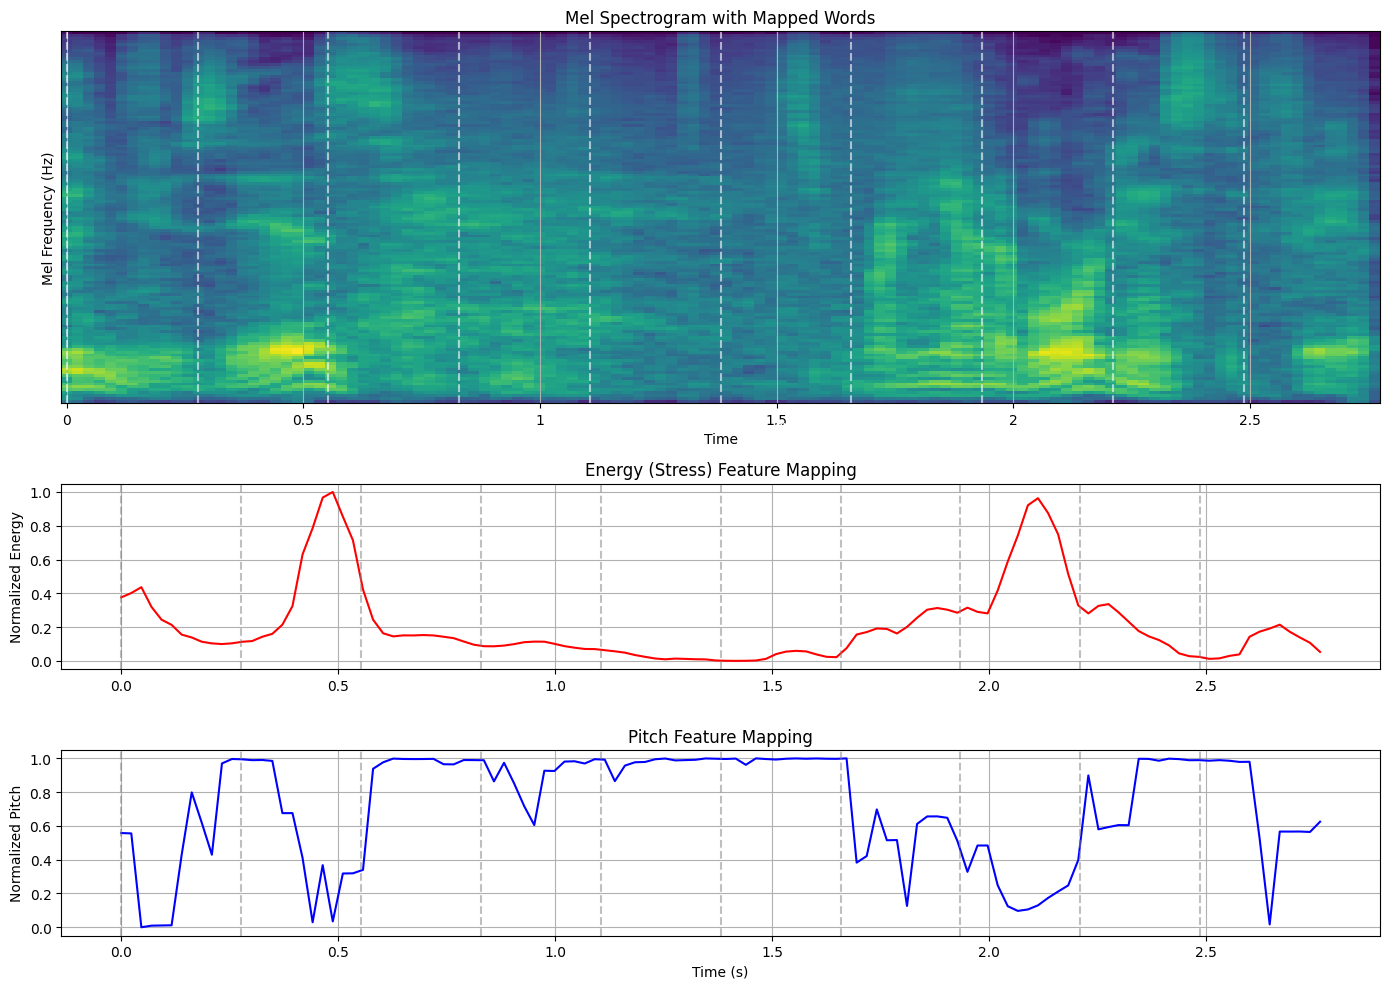

In [42]:
import moviepy.editor as mp
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os

# Step 1: Extract Audio from Video
video_path = "/content/4_S04E13_032_u.mp4"  # Replace with your video path
audio_path = "extracted_audio.wav"

video = mp.VideoFileClip(video_path)
video.audio.write_audiofile(audio_path)

# Step 2: Load Extracted Audio
y, sr_rate = librosa.load(audio_path)

# Feature Extraction
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr_rate, n_mels=128)
mel_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
time_stamps = librosa.times_like(mel_spectrogram[0], sr=sr_rate)

energy = librosa.feature.rms(y=y)[0]
pitches, magnitudes = librosa.piptrack(y=y, sr=sr_rate)
pitch_values = np.max(pitches, axis=0)

# Normalize features for mapping
normalized_energy = (energy - np.min(energy)) / (np.max(energy) - np.min(energy))
normalized_pitch = (pitch_values - np.min(pitch_values)) / (np.max(pitch_values) - np.min(pitch_values))

# Transcription and mapping
transcription = "Good news is, he's running out of organs to fail."

# Map words to timestamps
def map_words_to_times(transcription, timestamps):
    words = transcription.split()
    actual_duration = timestamps[-1] if len(timestamps) > 0 else 0
    segment_times = np.linspace(0, actual_duration, num=len(words) + 1)
    word_times = [(segment_times[i], segment_times[i + 1], word) for i, word in enumerate(words)]
    return word_times

word_times = map_words_to_times(transcription, time_stamps)

# Visualization
fig, ax = plt.subplots(3, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [2, 1, 1]})

# Mel Spectrogram
librosa.display.specshow(mel_db, x_axis='time', sr=sr_rate, cmap='viridis', ax=ax[0])
ax[0].set_title('Mel Spectrogram with Mapped Words')
ax[0].set_ylabel("Mel Frequency (Hz)")
ax[0].grid(True)

for start, end, word in word_times:
    ax[0].axvline(x=start, color='white', linestyle='--', alpha=0.6)
    ax[0].text((start + end) / 2, mel_db.max() - 10, word, color='white', fontsize=10, ha='center')

# Energy and Stress
ax[1].plot(time_stamps[:len(normalized_energy)], normalized_energy, label="Energy (Stress)", color='red')
ax[1].set_title("Energy (Stress) Feature Mapping")
ax[1].set_ylabel("Normalized Energy")
ax[1].grid(True)

# Pitch Mapping
ax[2].plot(time_stamps[:len(normalized_pitch)], normalized_pitch, label="Pitch", color='blue')
ax[2].set_title("Pitch Feature Mapping")
ax[2].set_ylabel("Normalized Pitch")
ax[2].grid(True)

for start, end, word in word_times:
    ax[1].axvline(x=start, color='gray', linestyle='--', alpha=0.5)
    ax[2].axvline(x=start, color='gray', linestyle='--', alpha=0.5)

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()


MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.


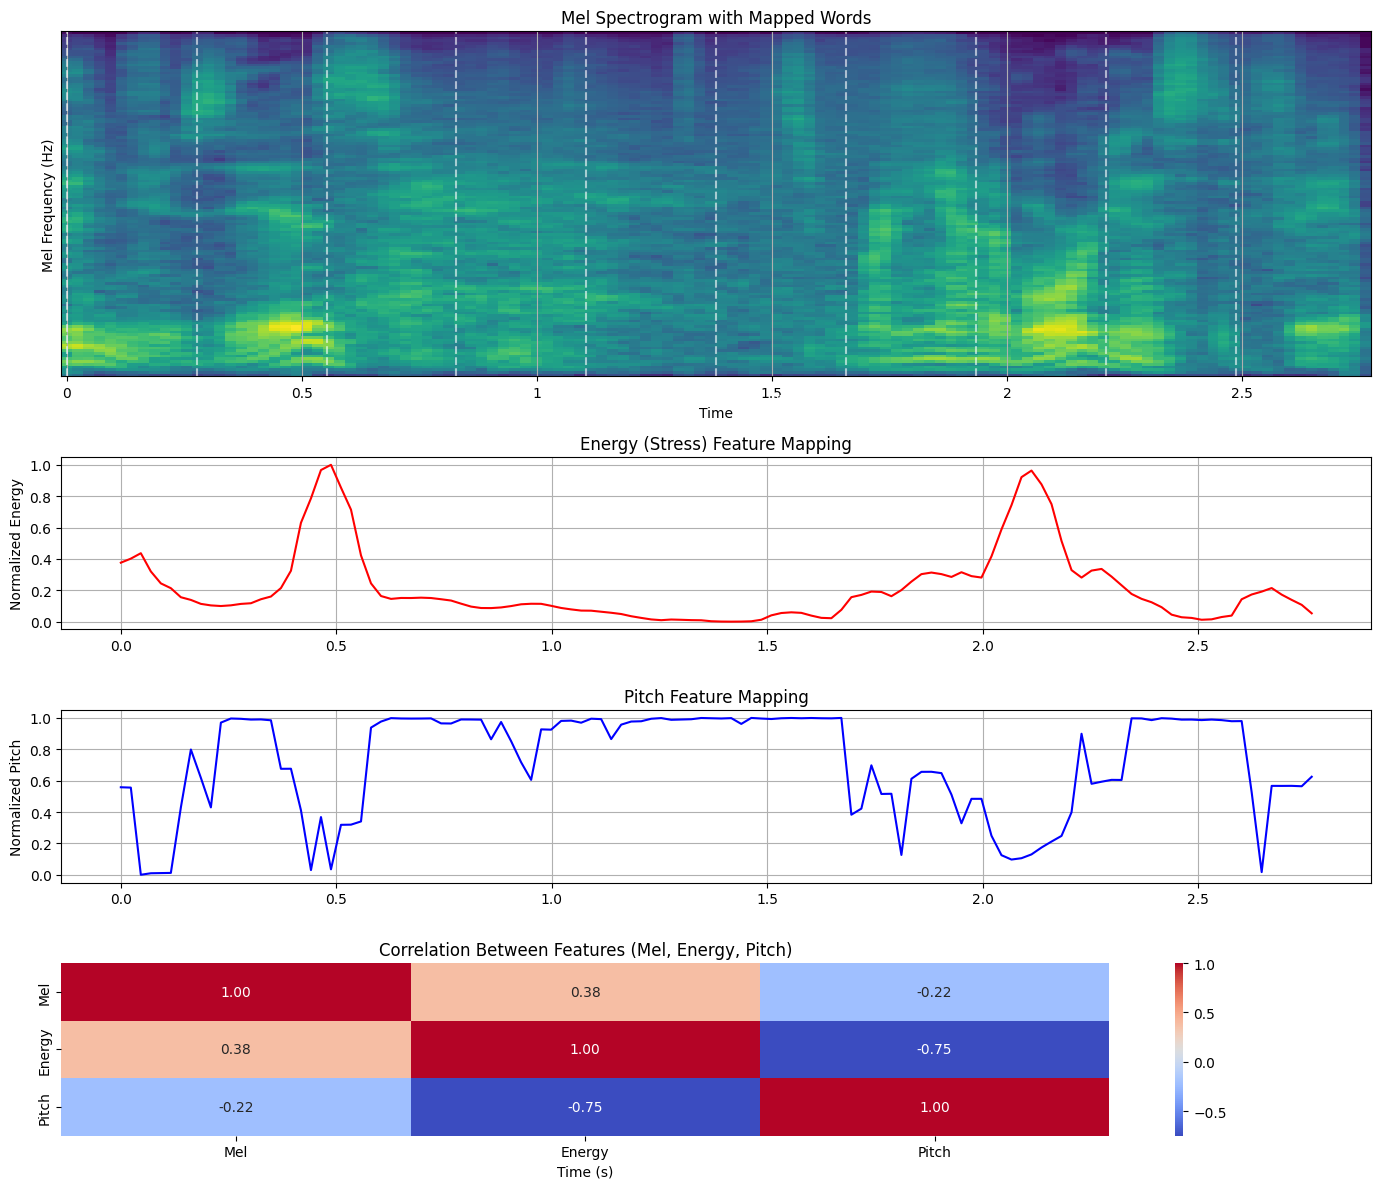

In [43]:
import moviepy.editor as mp
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 1: Extract Audio from Video
video_path = "/content/4_S04E13_032_u.mp4"  # Replace with your video path
audio_path = "extracted_audio.wav"

video = mp.VideoFileClip(video_path)
video.audio.write_audiofile(audio_path)

# Step 2: Load Extracted Audio
y, sr_rate = librosa.load(audio_path)

# Feature Extraction
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr_rate, n_mels=128)
mel_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
time_stamps = librosa.times_like(mel_spectrogram[0], sr=sr_rate)

energy = librosa.feature.rms(y=y)[0]
pitches, magnitudes = librosa.piptrack(y=y, sr=sr_rate)
pitch_values = np.max(pitches, axis=0)

# Normalize features
normalized_energy = (energy - np.min(energy)) / (np.max(energy) - np.min(energy))
normalized_pitch = (pitch_values - np.min(pitch_values)) / (np.max(pitch_values) - np.min(pitch_values))
mel_mean = np.mean(mel_db, axis=0)
normalized_mel = (mel_mean - np.min(mel_mean)) / (np.max(mel_mean) - np.min(mel_mean))

# Compute correlation
features = np.vstack([normalized_mel[:len(normalized_energy)], normalized_energy, normalized_pitch[:len(normalized_energy)]]).T
corr_matrix = np.corrcoef(features.T)

# Transcription and mapping
transcription = "Good news is, he's running out of organs to fail."
def map_words_to_times(transcription, timestamps):
    words = transcription.split()
    actual_duration = timestamps[-1] if len(timestamps) > 0 else 0
    segment_times = np.linspace(0, actual_duration, num=len(words) + 1)
    word_times = [(segment_times[i], segment_times[i + 1], word) for i, word in enumerate(words)]
    return word_times

word_times = map_words_to_times(transcription, time_stamps)

# Visualization
fig, ax = plt.subplots(4, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [2, 1, 1, 1]})

# Mel Spectrogram with Mapped Words
librosa.display.specshow(mel_db, x_axis='time', sr=sr_rate, cmap='viridis', ax=ax[0])
ax[0].set_title('Mel Spectrogram with Mapped Words')
ax[0].set_ylabel("Mel Frequency (Hz)")
ax[0].grid(True)

for start, end, word in word_times:
    ax[0].axvline(x=start, color='white', linestyle='--', alpha=0.6)
    ax[0].text((start + end) / 2, mel_db.max() - 10, word, color='white', fontsize=10, ha='center')

# Energy (Stress) Feature
ax[1].plot(time_stamps[:len(normalized_energy)], normalized_energy, label="Energy (Stress)", color='red')
ax[1].set_title("Energy (Stress) Feature Mapping")
ax[1].set_ylabel("Normalized Energy")
ax[1].grid(True)

# Pitch Feature
ax[2].plot(time_stamps[:len(normalized_pitch)], normalized_pitch, label="Pitch", color='blue')
ax[2].set_title("Pitch Feature Mapping")
ax[2].set_ylabel("Normalized Pitch")
ax[2].grid(True)

# Correlation Matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=['Mel', 'Energy', 'Pitch'], yticklabels=['Mel', 'Energy', 'Pitch'], ax=ax[3])
ax[3].set_title("Correlation Between Features (Mel, Energy, Pitch)")

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()


MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.


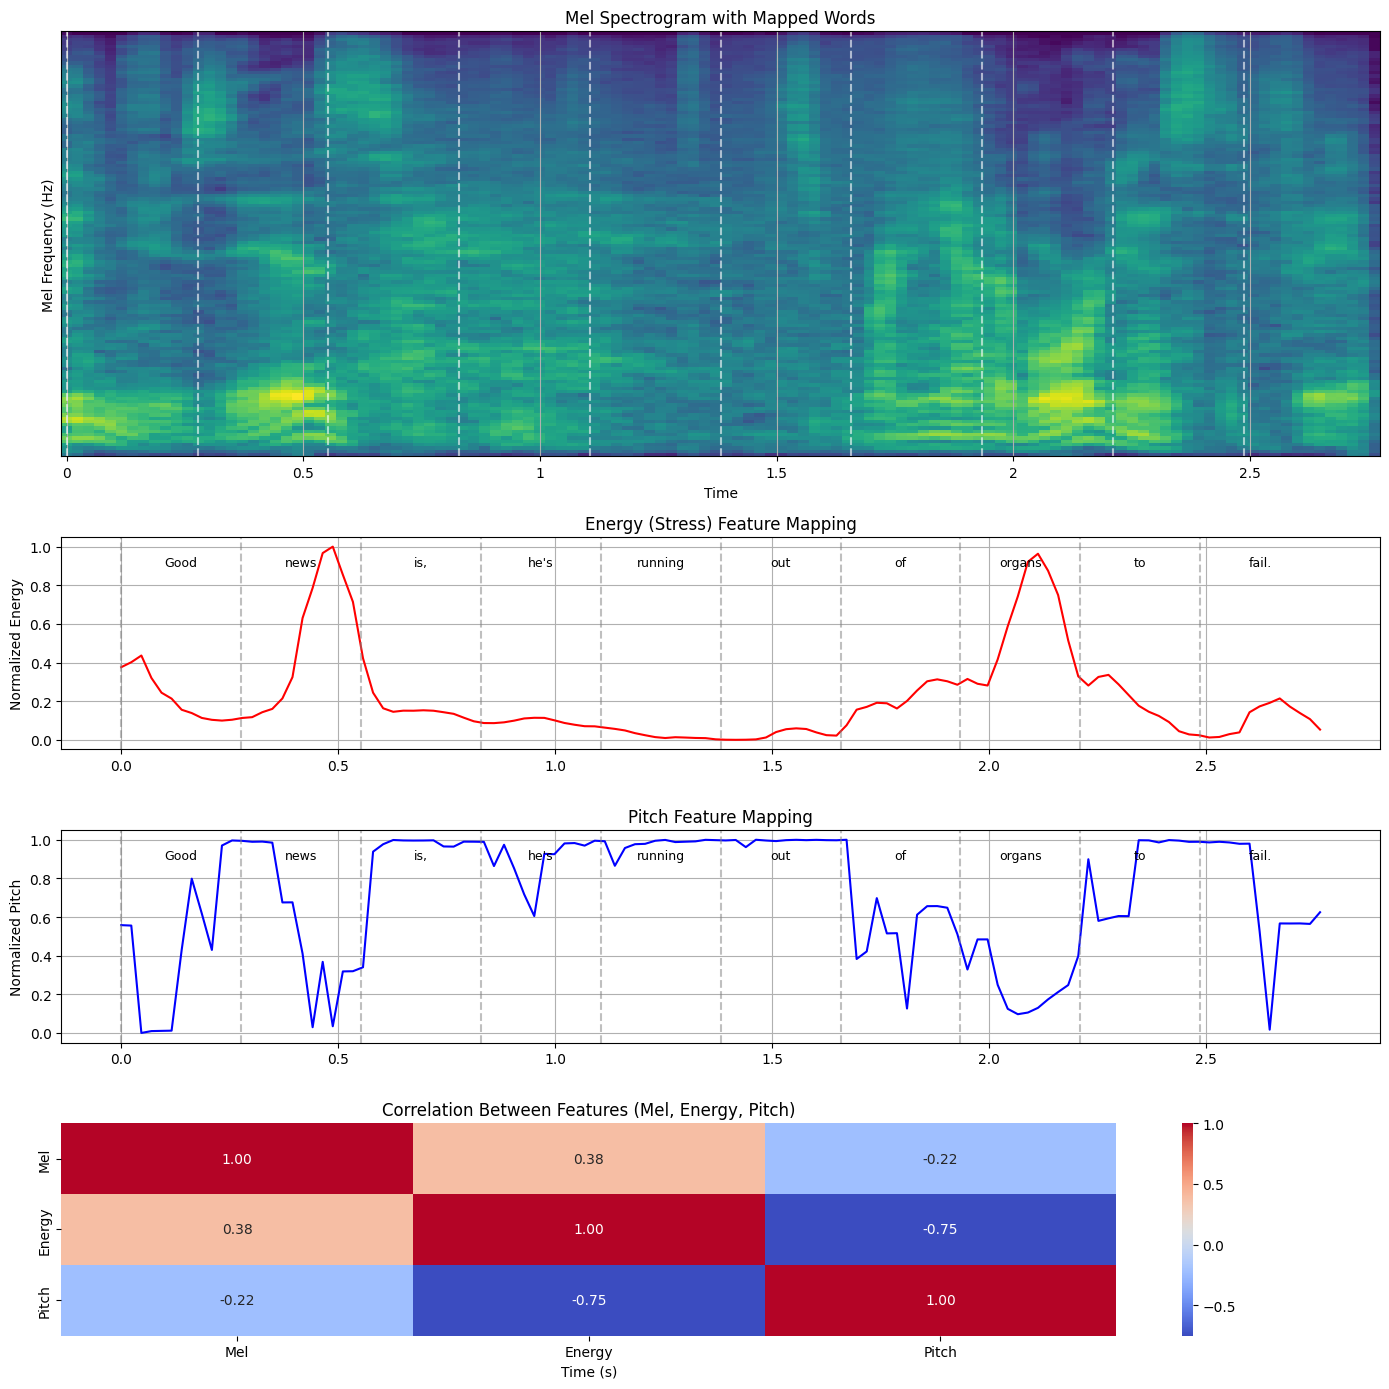

In [44]:
import moviepy.editor as mp
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 1: Extract Audio from Video
video_path = "/content/4_S04E13_032_u.mp4"  # Replace with your video path
audio_path = "extracted_audio.wav"

video = mp.VideoFileClip(video_path)
video.audio.write_audiofile(audio_path)

# Step 2: Load Extracted Audio
y, sr_rate = librosa.load(audio_path)

# Feature Extraction
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr_rate, n_mels=128)
mel_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
time_stamps = librosa.times_like(mel_spectrogram[0], sr=sr_rate)

energy = librosa.feature.rms(y=y)[0]
pitches, magnitudes = librosa.piptrack(y=y, sr=sr_rate)
pitch_values = np.max(pitches, axis=0)

# Normalize features
normalized_energy = (energy - np.min(energy)) / (np.max(energy) - np.min(energy))
normalized_pitch = (pitch_values - np.min(pitch_values)) / (np.max(pitch_values) - np.min(pitch_values))
mel_mean = np.mean(mel_db, axis=0)
normalized_mel = (mel_mean - np.min(mel_mean)) / (np.max(mel_mean) - np.min(mel_mean))

# Transcription and mapping
transcription = "Good news is, he's running out of organs to fail."
def map_words_to_times(transcription, timestamps):
    words = transcription.split()
    actual_duration = timestamps[-1] if len(timestamps) > 0 else 0
    segment_times = np.linspace(0, actual_duration, num=len(words) + 1)
    word_times = [(segment_times[i], segment_times[i + 1], word) for i, word in enumerate(words)]
    return word_times

word_times = map_words_to_times(transcription, time_stamps)

# Visualization
fig, ax = plt.subplots(4, 1, figsize=(14, 14), gridspec_kw={'height_ratios': [2, 1, 1, 1]})

# Mel Spectrogram with Word Mapping
librosa.display.specshow(mel_db, x_axis='time', sr=sr_rate, cmap='viridis', ax=ax[0])
ax[0].set_title('Mel Spectrogram with Mapped Words')
ax[0].set_ylabel("Mel Frequency (Hz)")
ax[0].grid(True)

for start, end, word in word_times:
    ax[0].axvline(x=start, color='white', linestyle='--', alpha=0.6)
    ax[0].text((start + end) / 2, mel_db.max() - 10, word, color='white', fontsize=10, ha='center')

# Energy (Stress) Feature Mapping
ax[1].plot(time_stamps[:len(normalized_energy)], normalized_energy, label="Energy (Stress)", color='red')
ax[1].set_title("Energy (Stress) Feature Mapping")
ax[1].set_ylabel("Normalized Energy")
ax[1].grid(True)

for start, end, word in word_times:
    ax[1].axvline(x=start, color='gray', linestyle='--', alpha=0.5)
    ax[1].text((start + end) / 2, 0.9, word, color='black', fontsize=9, ha='center')

# Pitch Feature Mapping
ax[2].plot(time_stamps[:len(normalized_pitch)], normalized_pitch, label="Pitch", color='blue')
ax[2].set_title("Pitch Feature Mapping")
ax[2].set_ylabel("Normalized Pitch")
ax[2].grid(True)

for start, end, word in word_times:
    ax[2].axvline(x=start, color='gray', linestyle='--', alpha=0.5)
    ax[2].text((start + end) / 2, 0.9, word, color='black', fontsize=9, ha='center')

# Correlation Matrix
corr_matrix = np.corrcoef([normalized_mel[:len(normalized_energy)], normalized_energy, normalized_pitch[:len(normalized_energy)]])
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=['Mel', 'Energy', 'Pitch'], yticklabels=['Mel', 'Energy', 'Pitch'], ax=ax[3])
ax[3].set_title("Correlation Between Features (Mel, Energy, Pitch)")

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()


MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.


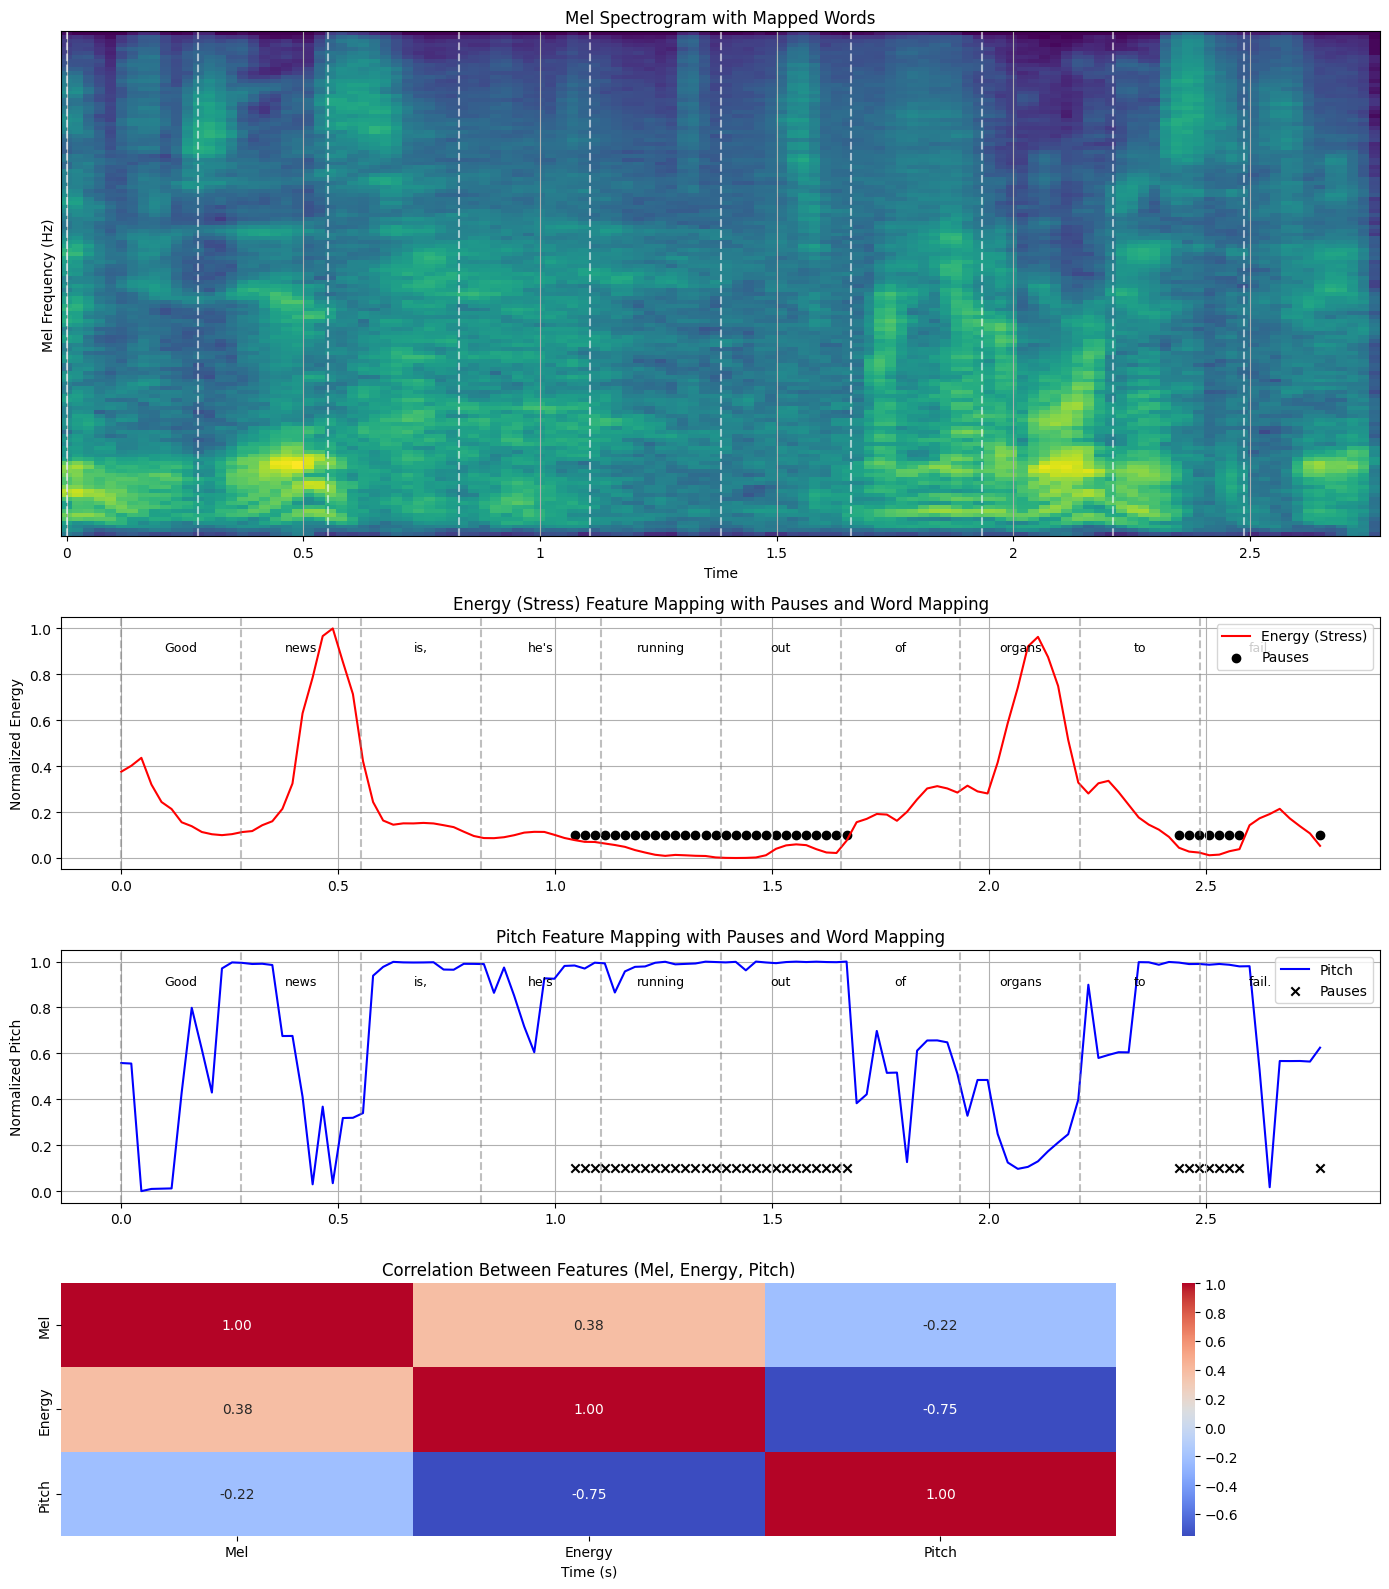

In [46]:
import moviepy.editor as mp
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 1: Extract Audio from Video
video_path = "/content/4_S04E13_032_u.mp4"  # Replace with your video path
audio_path = "extracted_audio.wav"

video = mp.VideoFileClip(video_path)
video.audio.write_audiofile(audio_path)

# Step 2: Load Extracted Audio
y, sr_rate = librosa.load(audio_path)

# Feature Extraction
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr_rate, n_mels=128)
mel_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
time_stamps = librosa.times_like(mel_spectrogram[0], sr=sr_rate)

energy = librosa.feature.rms(y=y)[0]
pitches, magnitudes = librosa.piptrack(y=y, sr=sr_rate)
pitch_values = np.max(pitches, axis=0)

# Detect pauses (silences)
silence_threshold = np.mean(energy) * 0.5
silent_frames = np.where(energy < silence_threshold)[0]
silence_times = librosa.frames_to_time(silent_frames, sr=sr_rate)

# Normalize features
normalized_energy = (energy - np.min(energy)) / (np.max(energy) - np.min(energy))
normalized_pitch = (pitch_values - np.min(pitch_values)) / (np.max(pitch_values) - np.min(pitch_values))
mel_mean = np.mean(mel_db, axis=0)
normalized_mel = (mel_mean - np.min(mel_mean)) / (np.max(mel_mean) - np.min(mel_mean))

# Transcription and mapping
transcription = "Good news is, he's running out of organs to fail."
def map_words_to_times(transcription, timestamps):
    words = transcription.split()
    actual_duration = timestamps[-1] if len(timestamps) > 0 else 0
    segment_times = np.linspace(0, actual_duration, num=len(words) + 1)
    word_times = [(segment_times[i], segment_times[i + 1], word) for i, word in enumerate(words)]
    return word_times

word_times = map_words_to_times(transcription, time_stamps)

# Visualization
fig, ax = plt.subplots(4, 1, figsize=(14, 16), gridspec_kw={'height_ratios': [2, 1, 1, 1]})

# Mel Spectrogram with Word Mapping
librosa.display.specshow(mel_db, x_axis='time', sr=sr_rate, cmap='viridis', ax=ax[0])
ax[0].set_title('Mel Spectrogram with Mapped Words')
ax[0].set_ylabel("Mel Frequency (Hz)")
ax[0].grid(True)

for start, end, word in word_times:
    ax[0].axvline(x=start, color='white', linestyle='--', alpha=0.6)
    ax[0].text((start + end) / 2, mel_db.max() - 10, word, color='white', fontsize=10, ha='center')

# Energy (Stress) Feature Mapping with Pauses
ax[1].plot(time_stamps[:len(normalized_energy)], normalized_energy, label="Energy (Stress)", color='red')
ax[1].scatter(silence_times, np.ones_like(silence_times) * 0.1, color='black', marker='o', label='Pauses')
ax[1].set_title("Energy (Stress) Feature Mapping with Pauses and Word Mapping")
ax[1].set_ylabel("Normalized Energy")
ax[1].legend(loc='upper right')
for start, end, word in word_times:
    ax[1].axvline(x=start, color='gray', linestyle='--', alpha=0.5)
    ax[1].text((start + end) / 2, 0.9, word, color='black', fontsize=9, ha='center')
ax[1].grid(True)

# Pitch Feature Mapping with Pauses
ax[2].plot(time_stamps[:len(normalized_pitch)], normalized_pitch, label="Pitch", color='blue')
ax[2].scatter(silence_times, np.ones_like(silence_times) * 0.1, color='black', marker='x', label='Pauses')
ax[2].set_title("Pitch Feature Mapping with Pauses and Word Mapping")
ax[2].set_ylabel("Normalized Pitch")
ax[2].legend(loc='upper right')
for start, end, word in word_times:
    ax[2].axvline(x=start, color='gray', linestyle='--', alpha=0.5)
    ax[2].text((start + end) / 2, 0.9, word, color='black', fontsize=9, ha='center')
ax[2].grid(True)

# Correlation Matrix
corr_matrix = np.corrcoef([normalized_mel[:len(normalized_energy)], normalized_energy, normalized_pitch[:len(normalized_energy)]])
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=['Mel', 'Energy', 'Pitch'], yticklabels=['Mel', 'Energy', 'Pitch'], ax=ax[3])
ax[3].set_title("Correlation Between Features (Mel, Energy, Pitch)")

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()


MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.
Word Mappings (Start - End):
Good: 0.00s - 0.28s
news: 0.28s - 0.55s
is,: 0.55s - 0.83s
he's: 0.83s - 1.11s
running: 1.11s - 1.38s
out: 1.38s - 1.66s
of: 1.66s - 1.93s
organs: 1.93s - 2.21s
to: 2.21s - 2.49s
fail.: 2.49s - 2.76s


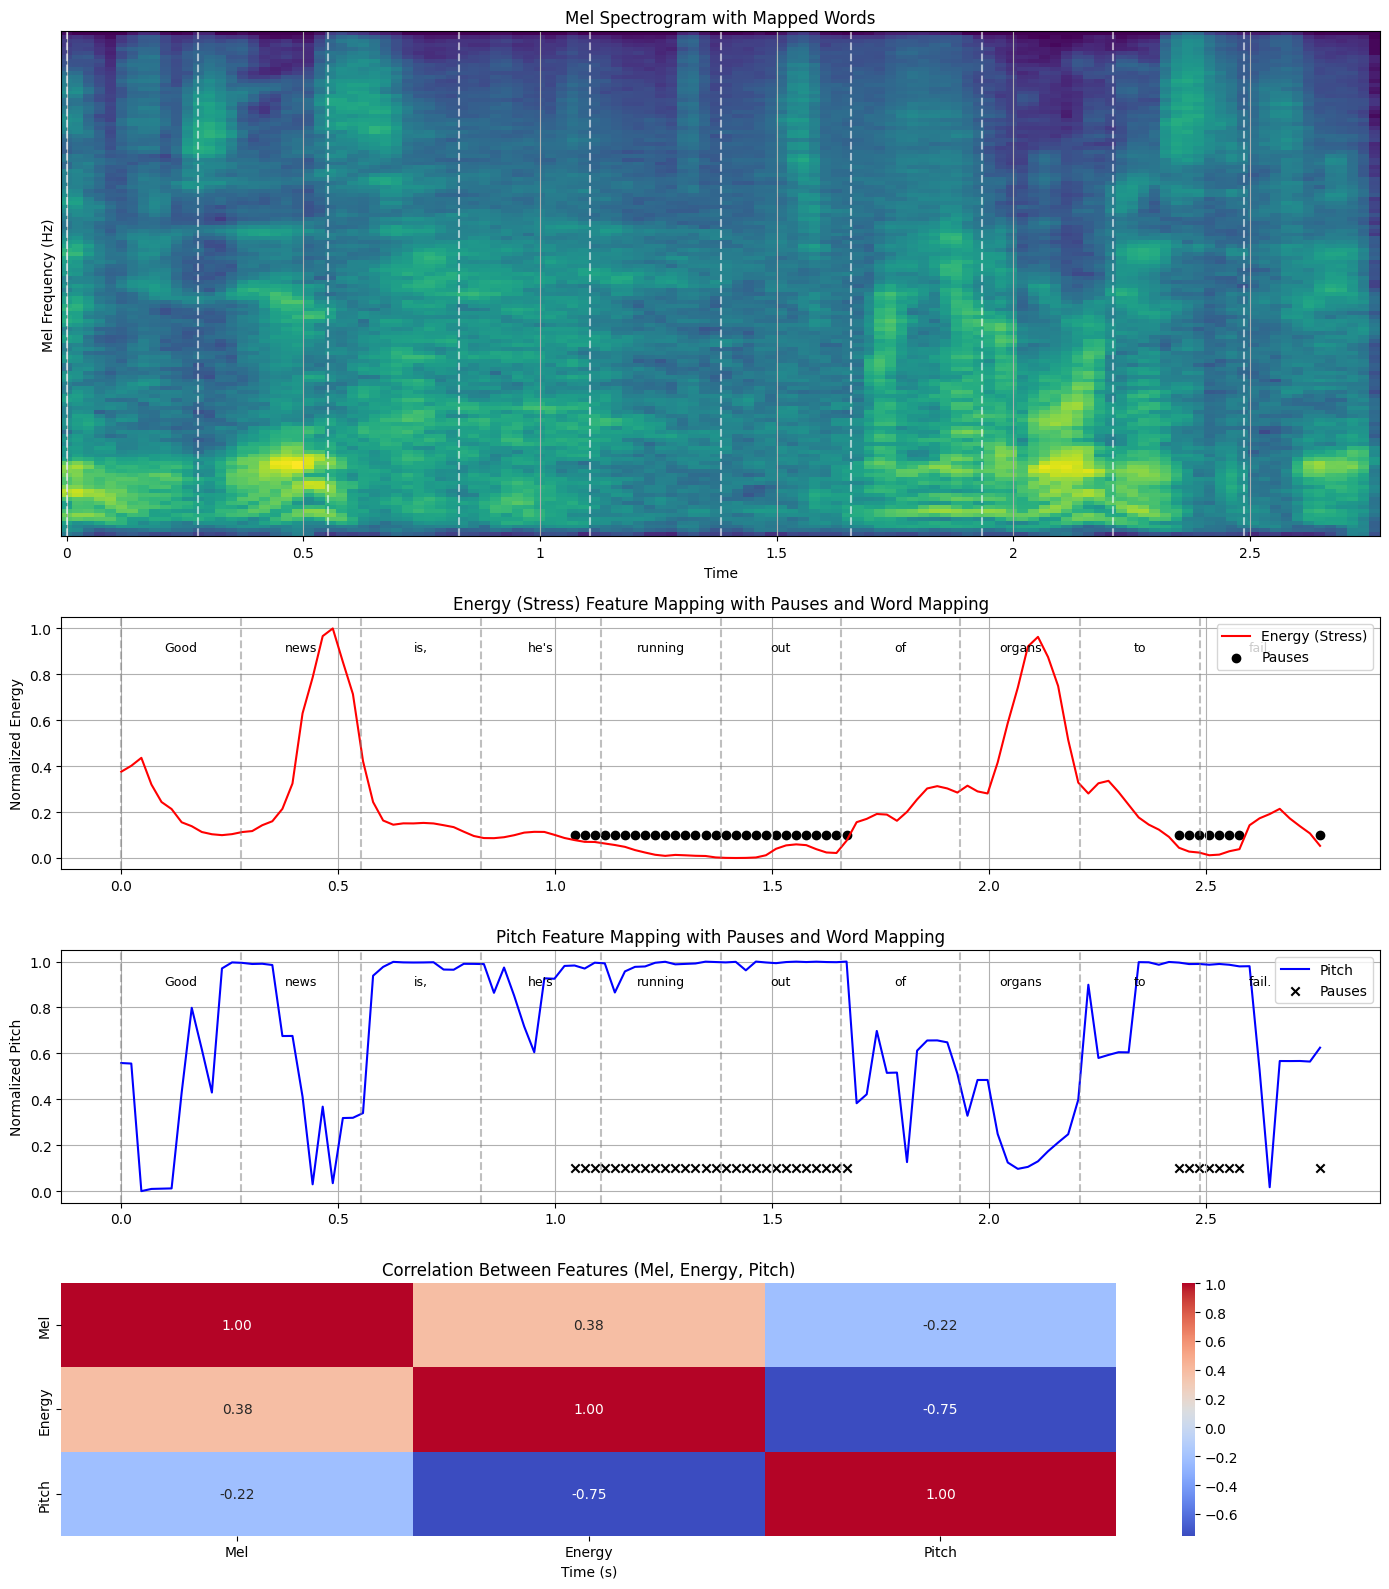

In [47]:
import moviepy.editor as mp
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 1: Extract Audio from Video
video_path = "/content/4_S04E13_032_u.mp4"  # Replace with your video path
audio_path = "extracted_audio.wav"

video = mp.VideoFileClip(video_path)
video.audio.write_audiofile(audio_path)

# Step 2: Load Extracted Audio
y, sr_rate = librosa.load(audio_path)

# Feature Extraction
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr_rate, n_mels=128)
mel_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
time_stamps = librosa.times_like(mel_spectrogram[0], sr=sr_rate)

energy = librosa.feature.rms(y=y)[0]
pitches, magnitudes = librosa.piptrack(y=y, sr=sr_rate)
pitch_values = np.max(pitches, axis=0)

# Detect pauses (silences)
silence_threshold = np.mean(energy) * 0.5
silent_frames = np.where(energy < silence_threshold)[0]
silence_times = librosa.frames_to_time(silent_frames, sr=sr_rate)

# Normalize features
normalized_energy = (energy - np.min(energy)) / (np.max(energy) - np.min(energy))
normalized_pitch = (pitch_values - np.min(pitch_values)) / (np.max(pitch_values) - np.min(pitch_values))
mel_mean = np.mean(mel_db, axis=0)
normalized_mel = (mel_mean - np.min(mel_mean)) / (np.max(mel_mean) - np.min(mel_mean))

# Transcription and mapping
transcription = "Good news is, he's running out of organs to fail."
def map_words_to_times(transcription, timestamps):
    words = transcription.split()
    actual_duration = timestamps[-1] if len(timestamps) > 0 else 0
    segment_times = np.linspace(0, actual_duration, num=len(words) + 1)
    word_times = [(segment_times[i], segment_times[i + 1], word) for i, word in enumerate(words)]

    # Extract and display the exact start and end times
    print("Word Mappings (Start - End):")
    for start, end, word in word_times:
        print(f"{word}: {start:.2f}s - {end:.2f}s")

    return word_times

word_times = map_words_to_times(transcription, time_stamps)

# Visualization
fig, ax = plt.subplots(4, 1, figsize=(14, 16), gridspec_kw={'height_ratios': [2, 1, 1, 1]})

# Mel Spectrogram with Word Mapping
librosa.display.specshow(mel_db, x_axis='time', sr=sr_rate, cmap='viridis', ax=ax[0])
ax[0].set_title('Mel Spectrogram with Mapped Words')
ax[0].set_ylabel("Mel Frequency (Hz)")
ax[0].grid(True)

for start, end, word in word_times:
    ax[0].axvline(x=start, color='white', linestyle='--', alpha=0.6)
    ax[0].text((start + end) / 2, mel_db.max() - 10, word, color='white', fontsize=10, ha='center')

# Energy (Stress) Feature Mapping with Pauses
ax[1].plot(time_stamps[:len(normalized_energy)], normalized_energy, label="Energy (Stress)", color='red')
ax[1].scatter(silence_times, np.ones_like(silence_times) * 0.1, color='black', marker='o', label='Pauses')
ax[1].set_title("Energy (Stress) Feature Mapping with Pauses and Word Mapping")
ax[1].set_ylabel("Normalized Energy")
ax[1].legend(loc='upper right')
for start, end, word in word_times:
    ax[1].axvline(x=start, color='gray', linestyle='--', alpha=0.5)
    ax[1].text((start + end) / 2, 0.9, word, color='black', fontsize=9, ha='center')
ax[1].grid(True)

# Pitch Feature Mapping with Pauses
ax[2].plot(time_stamps[:len(normalized_pitch)], normalized_pitch, label="Pitch", color='blue')
ax[2].scatter(silence_times, np.ones_like(silence_times) * 0.1, color='black', marker='x', label='Pauses')
ax[2].set_title("Pitch Feature Mapping with Pauses and Word Mapping")
ax[2].set_ylabel("Normalized Pitch")
ax[2].legend(loc='upper right')
for start, end, word in word_times:
    ax[2].axvline(x=start, color='gray', linestyle='--', alpha=0.5)
    ax[2].text((start + end) / 2, 0.9, word, color='black', fontsize=9, ha='center')
ax[2].grid(True)

# Correlation Matrix
corr_matrix = np.corrcoef([normalized_mel[:len(normalized_energy)], normalized_energy, normalized_pitch[:len(normalized_energy)]])
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=['Mel', 'Energy', 'Pitch'], yticklabels=['Mel', 'Energy', 'Pitch'], ax=ax[3])
ax[3].set_title("Correlation Between Features (Mel, Energy, Pitch)")

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()


MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.


Word Mappings (Start - End):
Good: 0.00s - 0.28s
news: 0.28s - 0.55s
is,: 0.55s - 0.83s
he's: 0.83s - 1.11s
running: 1.11s - 1.38s
out: 1.38s - 1.66s
of: 1.66s - 1.93s
organs: 1.93s - 2.21s
to: 2.21s - 2.49s
fail.: 2.49s - 2.76s


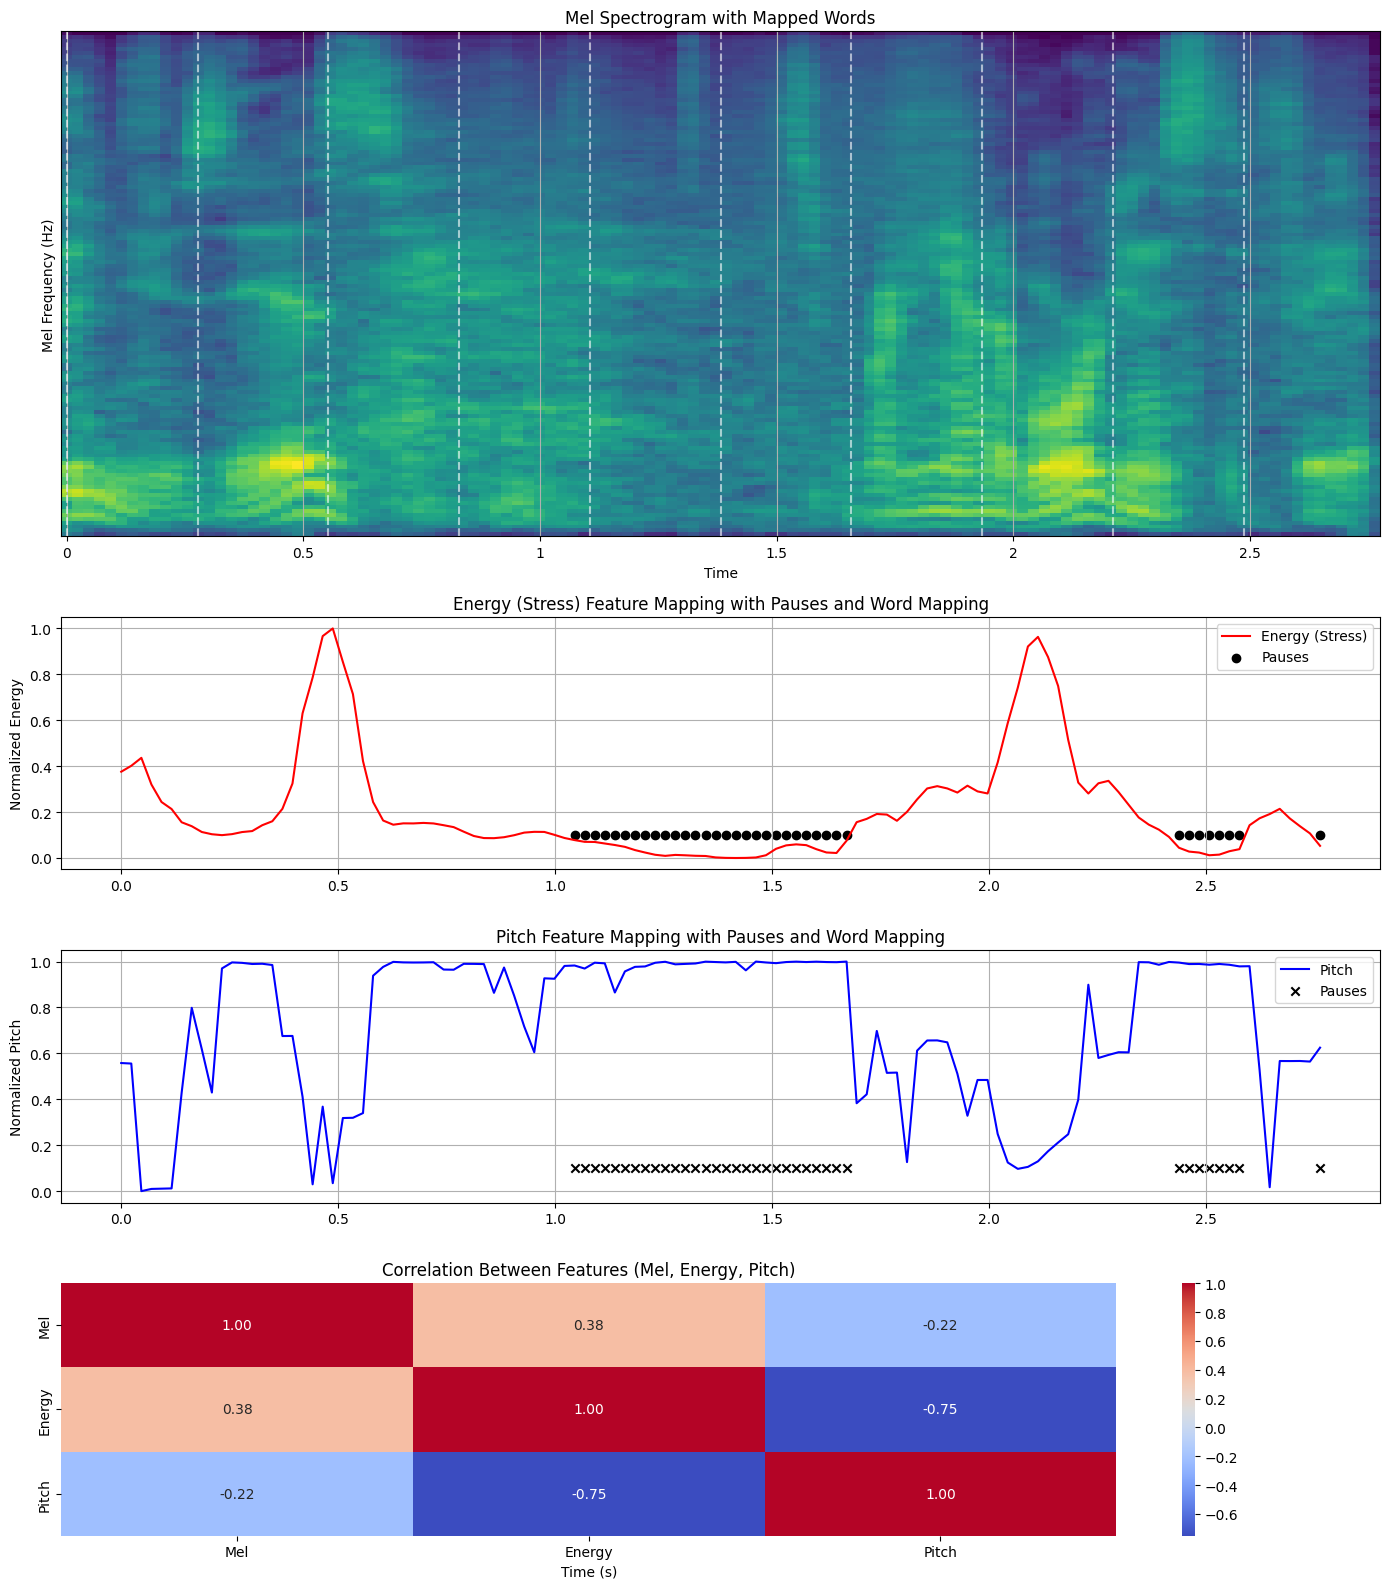

In [48]:
# Import necessary libraries for audio and data analysis
import moviepy.editor as mp
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 1: Extract Audio from Video
video_path = "/content/4_S04E13_032_u.mp4"  # Path to your video file
audio_path = "extracted_audio.wav"  # Path to save the extracted audio

# Load video and extract audio
video = mp.VideoFileClip(video_path)
video.audio.write_audiofile(audio_path)

# Step 2: Load Extracted Audio
# Load the audio using librosa for feature extraction
y, sr_rate = librosa.load(audio_path)

# Step 3: Feature Extraction
# Compute Mel Spectrogram to analyze speech patterns
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr_rate, n_mels=128)
mel_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
time_stamps = librosa.times_like(mel_spectrogram[0], sr=sr_rate)

# Compute energy (RMS) to analyze stress and intensity
energy = librosa.feature.rms(y=y)[0]

# Compute pitch using piptrack for tonal analysis
pitches, magnitudes = librosa.piptrack(y=y, sr=sr_rate)
pitch_values = np.max(pitches, axis=0)

# Step 4: Silence Detection (Pauses)
silence_threshold = np.mean(energy) * 0.5  # Threshold for detecting silence
silent_frames = np.where(energy < silence_threshold)[0]  # Frames with low energy
silence_times = librosa.frames_to_time(silent_frames, sr=sr_rate)

# Step 5: Normalization for Feature Mapping
# Normalize features for consistent comparison
normalized_energy = (energy - np.min(energy)) / (np.max(energy) - np.min(energy))
normalized_pitch = (pitch_values - np.min(pitch_values)) / (np.max(pitch_values) - np.min(pitch_values))
mel_mean = np.mean(mel_db, axis=0)
normalized_mel = (mel_mean - np.min(mel_mean)) / (np.max(mel_mean) - np.min(mel_mean))

# Step 6: Transcription and Word Mapping
transcription = "Good news is, he's running out of organs to fail."  # Provided transcription

# Mapping words to time intervals based on the Mel spectrogram
def map_words_to_times(transcription, timestamps):
    words = transcription.split()
    actual_duration = timestamps[-1] if len(timestamps) > 0 else 0
    segment_times = np.linspace(0, actual_duration, num=len(words) + 1)
    word_times = [(segment_times[i], segment_times[i + 1], word) for i, word in enumerate(words)]

    # Display exact start and end times for each word
    print("Word Mappings (Start - End):")
    for start, end, word in word_times:
        print(f"{word}: {start:.2f}s - {end:.2f}s")

    return word_times

word_times = map_words_to_times(transcription, time_stamps)

# Step 7: Visualization
fig, ax = plt.subplots(4, 1, figsize=(14, 16), gridspec_kw={'height_ratios': [2, 1, 1, 1]})

# Mel Spectrogram with Word Mapping
librosa.display.specshow(mel_db, x_axis='time', sr=sr_rate, cmap='viridis', ax=ax[0])
ax[0].set_title('Mel Spectrogram with Mapped Words')
ax[0].set_ylabel("Mel Frequency (Hz)")
ax[0].grid(True)

# Mark word intervals on the Mel spectrogram
for start, end, word in word_times:
    ax[0].axvline(x=start, color='white', linestyle='--', alpha=0.6)
    ax[0].text((start + end) / 2, mel_db.max() - 10, word, color='white', fontsize=10, ha='center')

# Energy (Stress) with Pauses
ax[1].plot(time_stamps[:len(normalized_energy)], normalized_energy, label="Energy (Stress)", color='red')
ax[1].scatter(silence_times, np.ones_like(silence_times) * 0.1, color='black', marker='o', label='Pauses')
ax[1].set_title("Energy (Stress) Feature Mapping with Pauses and Word Mapping")
ax[1].set_ylabel("Normalized Energy")
ax[1].legend(loc='upper right')
ax[1].grid(True)

# Pitch Mapping with Pauses
ax[2].plot(time_stamps[:len(normalized_pitch)], normalized_pitch, label="Pitch", color='blue')
ax[2].scatter(silence_times, np.ones_like(silence_times) * 0.1, color='black', marker='x', label='Pauses')
ax[2].set_title("Pitch Feature Mapping with Pauses and Word Mapping")
ax[2].set_ylabel("Normalized Pitch")
ax[2].legend(loc='upper right')
ax[2].grid(True)

# Correlation Analysis between features
corr_matrix = np.corrcoef([normalized_mel[:len(normalized_energy)], normalized_energy, normalized_pitch[:len(normalized_energy)]])
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=['Mel', 'Energy', 'Pitch'], yticklabels=['Mel', 'Energy', 'Pitch'], ax=ax[3])
ax[3].set_title("Correlation Between Features (Mel, Energy, Pitch)")

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()


MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.
Word Mappings (Start - End):
Good: 0.00s - 0.28s
news: 0.28s - 0.55s
is,: 0.55s - 0.83s
he's: 0.83s - 1.11s
running: 1.11s - 1.38s
out: 1.38s - 1.66s
of: 1.66s - 1.93s
organs: 1.93s - 2.21s
to: 2.21s - 2.49s
fail.: 2.49s - 2.76s


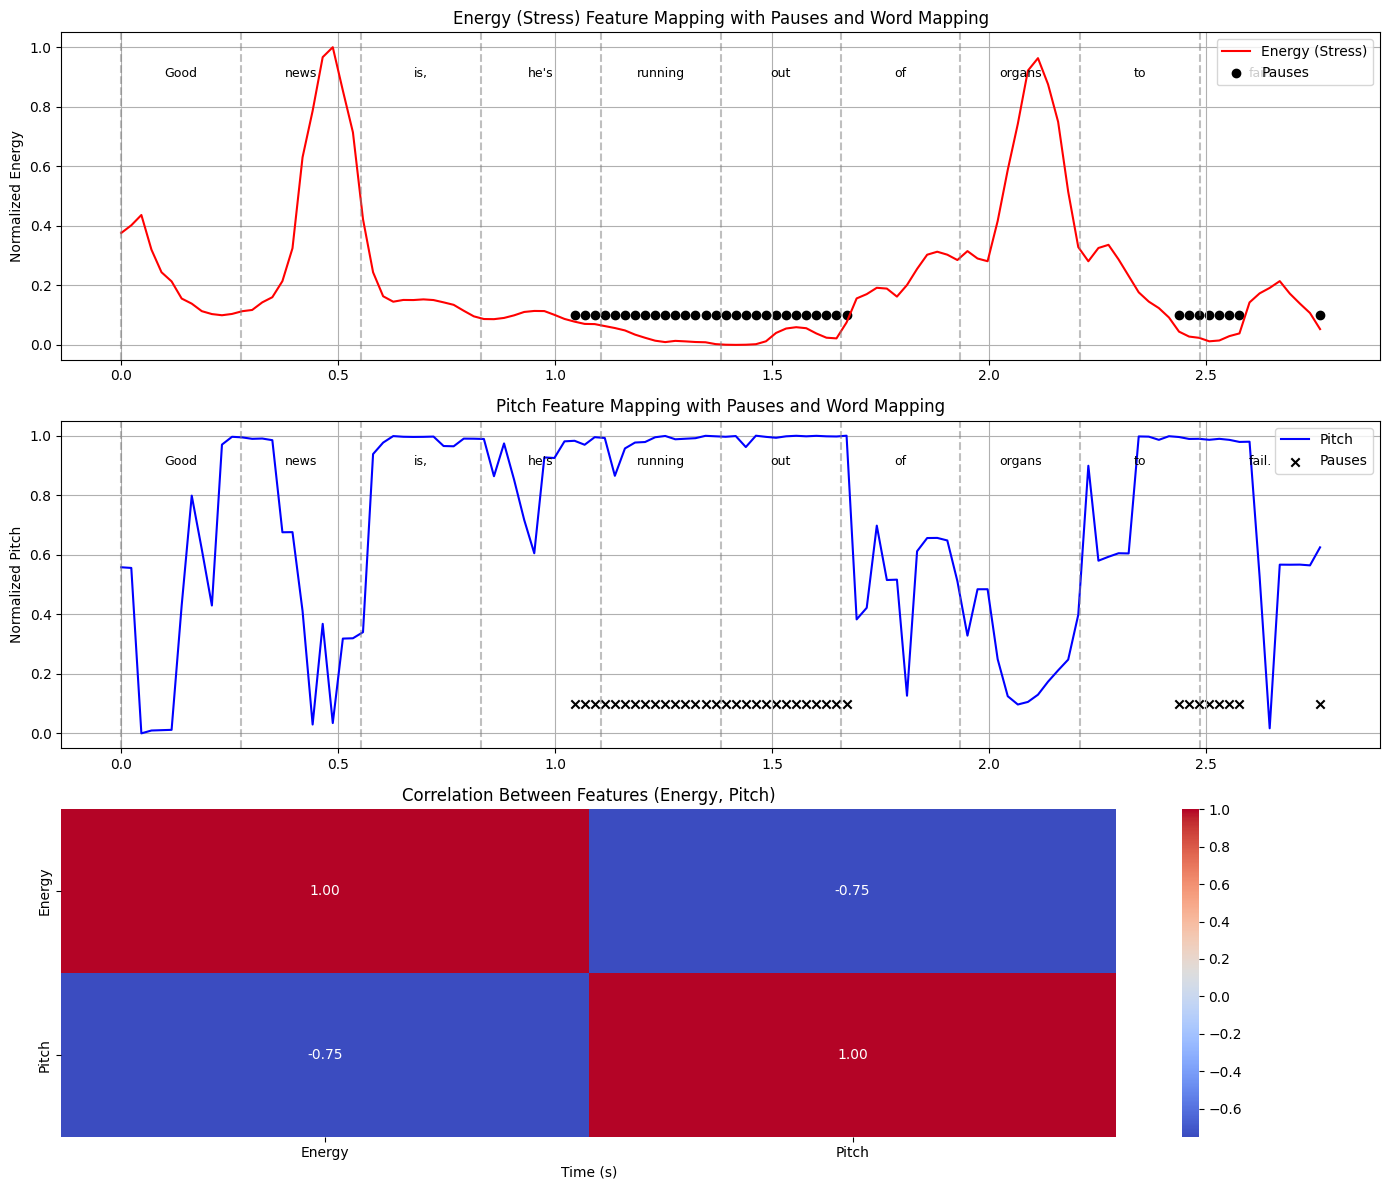

In [49]:
# Import necessary libraries for audio and data analysis
import moviepy.editor as mp
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 1: Extract Audio from Video
video_path = "/content/4_S04E13_032_u.mp4"  # Path to your video file
audio_path = "extracted_audio.wav"  # Path to save the extracted audio

# Load video and extract audio
video = mp.VideoFileClip(video_path)
video.audio.write_audiofile(audio_path)

# Step 2: Load Extracted Audio
# Load the audio using librosa for feature extraction
y, sr_rate = librosa.load(audio_path)

# Step 3: Feature Extraction (without Mel Frequency)
# Compute energy (RMS) to analyze stress and intensity
energy = librosa.feature.rms(y=y)[0]

# Compute pitch using piptrack for tonal analysis
pitches, magnitudes = librosa.piptrack(y=y, sr=sr_rate)
pitch_values = np.max(pitches, axis=0)

# Step 4: Silence Detection (Pauses)
silence_threshold = np.mean(energy) * 0.5  # Threshold for detecting silence
silent_frames = np.where(energy < silence_threshold)[0]  # Frames with low energy
silence_times = librosa.frames_to_time(silent_frames, sr=sr_rate)

# Step 5: Normalization for Feature Mapping
# Normalize features for consistent comparison
normalized_energy = (energy - np.min(energy)) / (np.max(energy) - np.min(energy))
normalized_pitch = (pitch_values - np.min(pitch_values)) / (np.max(pitch_values) - np.min(pitch_values))

# Step 6: Transcription and Word Mapping
transcription = "Good news is, he's running out of organs to fail."  # Provided transcription

# Mapping words to time intervals

def map_words_to_times(transcription, timestamps):
    words = transcription.split()
    actual_duration = timestamps[-1] if len(timestamps) > 0 else 0
    segment_times = np.linspace(0, actual_duration, num=len(words) + 1)
    word_times = [(segment_times[i], segment_times[i + 1], word) for i, word in enumerate(words)]

    # Display exact start and end times for each word
    print("Word Mappings (Start - End):")
    for start, end, word in word_times:
        print(f"{word}: {start:.2f}s - {end:.2f}s")

    return word_times

# Generate time stamps
time_stamps = librosa.times_like(energy, sr=sr_rate)
word_times = map_words_to_times(transcription, time_stamps)

# Step 7: Visualization (without Mel Frequency)
fig, ax = plt.subplots(3, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [1, 1, 1]})

# Energy (Stress) with Pauses
ax[0].plot(time_stamps[:len(normalized_energy)], normalized_energy, label="Energy (Stress)", color='red')
ax[0].scatter(silence_times, np.ones_like(silence_times) * 0.1, color='black', marker='o', label='Pauses')
ax[0].set_title("Energy (Stress) Feature Mapping with Pauses and Word Mapping")
ax[0].set_ylabel("Normalized Energy")
ax[0].legend(loc='upper right')
ax[0].grid(True)

# Mark word mappings
for start, end, word in word_times:
    ax[0].axvline(x=start, color='gray', linestyle='--', alpha=0.5)
    ax[0].text((start + end) / 2, 0.9, word, color='black', fontsize=9, ha='center')

# Pitch Feature Mapping with Pauses
ax[1].plot(time_stamps[:len(normalized_pitch)], normalized_pitch, label="Pitch", color='blue')
ax[1].scatter(silence_times, np.ones_like(silence_times) * 0.1, color='black', marker='x', label='Pauses')
ax[1].set_title("Pitch Feature Mapping with Pauses and Word Mapping")
ax[1].set_ylabel("Normalized Pitch")
ax[1].legend(loc='upper right')
ax[1].grid(True)

for start, end, word in word_times:
    ax[1].axvline(x=start, color='gray', linestyle='--', alpha=0.5)
    ax[1].text((start + end) / 2, 0.9, word, color='black', fontsize=9, ha='center')

# Correlation Analysis between features (Energy and Pitch)
corr_matrix = np.corrcoef([normalized_energy, normalized_pitch[:len(normalized_energy)]])
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=['Energy', 'Pitch'], yticklabels=['Energy', 'Pitch'], ax=ax[2])
ax[2].set_title("Correlation Between Features (Energy, Pitch)")

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()


MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.
Word Mappings (Start - End):
Good: 0.00s - 0.28s
news: 0.28s - 0.55s
is,: 0.55s - 0.83s
he's: 0.83s - 1.11s
running: 1.11s - 1.38s
out: 1.38s - 1.66s
of: 1.66s - 1.93s
organs: 1.93s - 2.21s
to: 2.21s - 2.49s
fail.: 2.49s - 2.76s


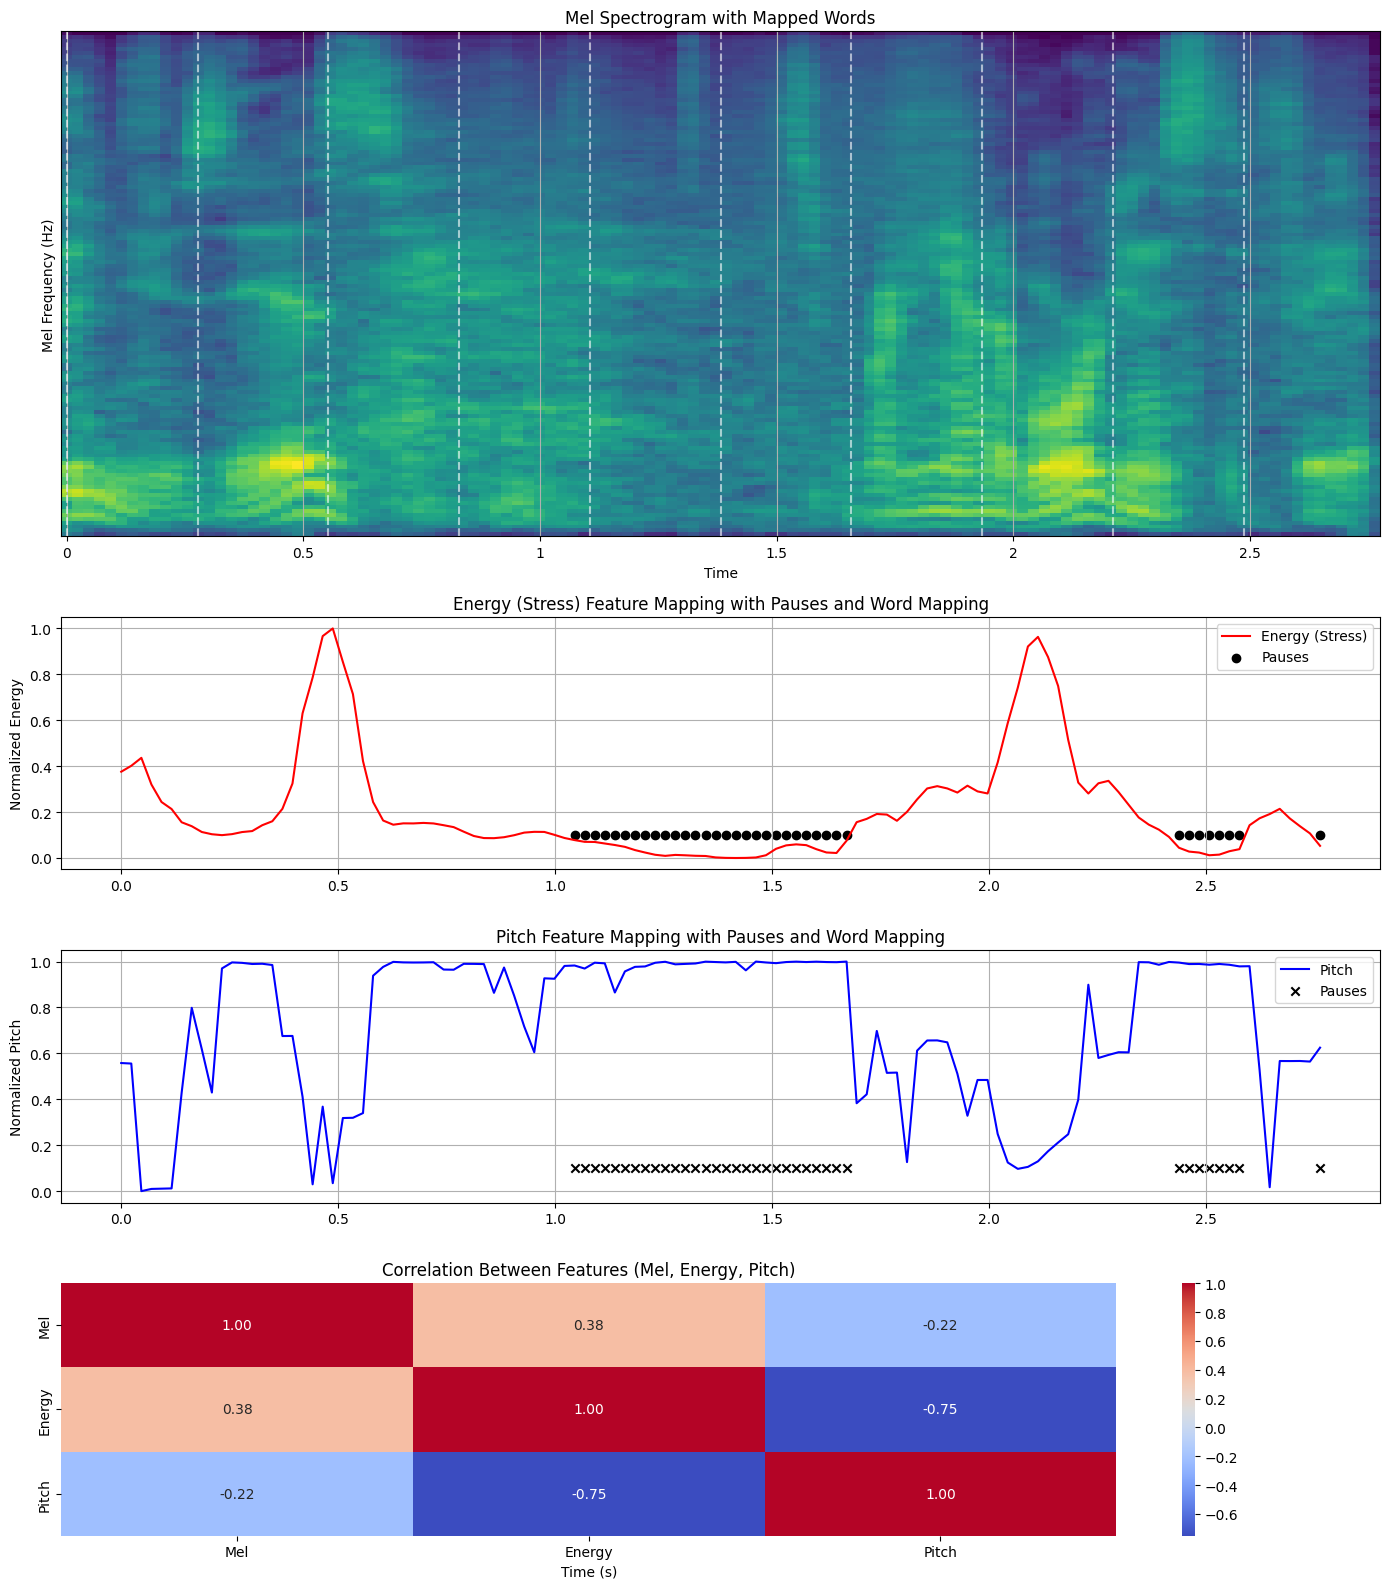

In [57]:
# Import necessary libraries for audio and data analysis
import moviepy.editor as mp
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 1: Extract Audio from Video
video_path = "/content/4_S04E13_032_u.mp4"  # Path to your video file
audio_path = "extracted_audio.wav"  # Path to save the extracted audio

# Load video and extract audio
video = mp.VideoFileClip(video_path)
video.audio.write_audiofile(audio_path)

# Step 2: Load Extracted Audio
# Load the audio using librosa for feature extraction
y, sr_rate = librosa.load(audio_path)

# Step 3: Feature Extraction
# Compute Mel Spectrogram to analyze speech patterns
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr_rate, n_mels=128)
mel_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
time_stamps = librosa.times_like(mel_spectrogram[0], sr=sr_rate)

# Compute energy (RMS) to analyze stress and intensity
energy = librosa.feature.rms(y=y)[0]

# Compute pitch using piptrack for tonal analysis
pitches, magnitudes = librosa.piptrack(y=y, sr=sr_rate)
pitch_values = np.max(pitches, axis=0)

# Step 4: Silence Detection (Pauses)
silence_threshold = np.mean(energy) * 0.5  # Threshold for detecting silence
silent_frames = np.where(energy < silence_threshold)[0]  # Frames with low energy
silence_times = librosa.frames_to_time(silent_frames, sr=sr_rate)

# Step 5: Normalization for Feature Mapping
# Normalize features for consistent comparison
normalized_energy = (energy - np.min(energy)) / (np.max(energy) - np.min(energy))
normalized_pitch = (pitch_values - np.min(pitch_values)) / (np.max(pitch_values) - np.min(pitch_values))
mel_mean = np.mean(mel_db, axis=0)
normalized_mel = (mel_mean - np.min(mel_mean)) / (np.max(mel_mean) - np.min(mel_mean))

# Step 6: Transcription and Word Mapping
transcription = "Good news is, he's running out of organs to fail."  # Provided transcription

# Mapping words to time intervals based on the Mel spectrogram
def map_words_to_times(transcription, timestamps):
    words = transcription.split()
    actual_duration = timestamps[-1] if len(timestamps) > 0 else 0
    segment_times = np.linspace(0, actual_duration, num=len(words) + 1)
    word_times = [(segment_times[i], segment_times[i + 1], word) for i, word in enumerate(words)]

    # Display exact start and end times for each word
    print("Word Mappings (Start - End):")
    for start, end, word in word_times:
        print(f"{word}: {start:.2f}s - {end:.2f}s")

    return word_times

word_times = map_words_to_times(transcription, time_stamps)

# Step 7: Visualization
fig, ax = plt.subplots(4, 1, figsize=(14, 16), gridspec_kw={'height_ratios': [2, 1, 1, 1]})

# Mel Spectrogram with Word Mapping
librosa.display.specshow(mel_db, x_axis='time', sr=sr_rate, cmap='viridis', ax=ax[0])
ax[0].set_title('Mel Spectrogram with Mapped Words')
ax[0].set_ylabel("Mel Frequency (Hz)")
ax[0].grid(True)

# Mark word intervals on the Mel spectrogram
for start, end, word in word_times:
    ax[0].axvline(x=start, color='white', linestyle='--', alpha=0.6)
    ax[0].text((start + end) / 2, mel_db.max() - 10, word, color='white', fontsize=10, ha='center')

# Energy (Stress) with Pauses
ax[1].plot(time_stamps[:len(normalized_energy)], normalized_energy, label="Energy (Stress)", color='red')
ax[1].scatter(silence_times, np.ones_like(silence_times) * 0.1, color='black', marker='o', label='Pauses')
ax[1].set_title("Energy (Stress) Feature Mapping with Pauses and Word Mapping")
ax[1].set_ylabel("Normalized Energy")
ax[1].legend(loc='upper right')
ax[1].grid(True)

# Pitch Mapping with Pauses
ax[2].plot(time_stamps[:len(normalized_pitch)], normalized_pitch, label="Pitch", color='blue')
ax[2].scatter(silence_times, np.ones_like(silence_times) * 0.1, color='black', marker='x', label='Pauses')
ax[2].set_title("Pitch Feature Mapping with Pauses and Word Mapping")
ax[2].set_ylabel("Normalized Pitch")
ax[2].legend(loc='upper right')
ax[2].grid(True)

# Correlation Analysis between features
corr_matrix = np.corrcoef([normalized_mel[:len(normalized_energy)], normalized_energy, normalized_pitch[:len(normalized_energy)]])
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=['Mel', 'Energy', 'Pitch'], yticklabels=['Mel', 'Energy', 'Pitch'], ax=ax[3])
ax[3].set_title("Correlation Between Features (Mel, Energy, Pitch)")

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()


MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.

Word Mappings with Aural Features:
Good (0.00s - 0.28s): Stress = 0.21, Pitch = increasing, Pause = No
news (0.28s - 0.55s): Stress = nan, Pitch = constant, Pause = No
is, (0.55s - 0.83s): Stress = nan, Pitch = constant, Pause = No
he's (0.83s - 1.11s): Stress = nan, Pitch = constant, Pause = Yes
running (1.11s - 1.38s): Stress = nan, Pitch = constant, Pause = Yes
out (1.38s - 1.66s): Stress = nan, Pitch = constant, Pause = Yes
of (1.66s - 1.93s): Stress = nan, Pitch = constant, Pause = Yes
organs (1.93s - 2.21s): Stress = nan, Pitch = constant, Pause = No
to (2.21s - 2.49s): Stress = nan, Pitch = constant, Pause = Yes
fail. (2.49s - 2.76s): Stress = nan, Pitch = constant, Pause = Yes


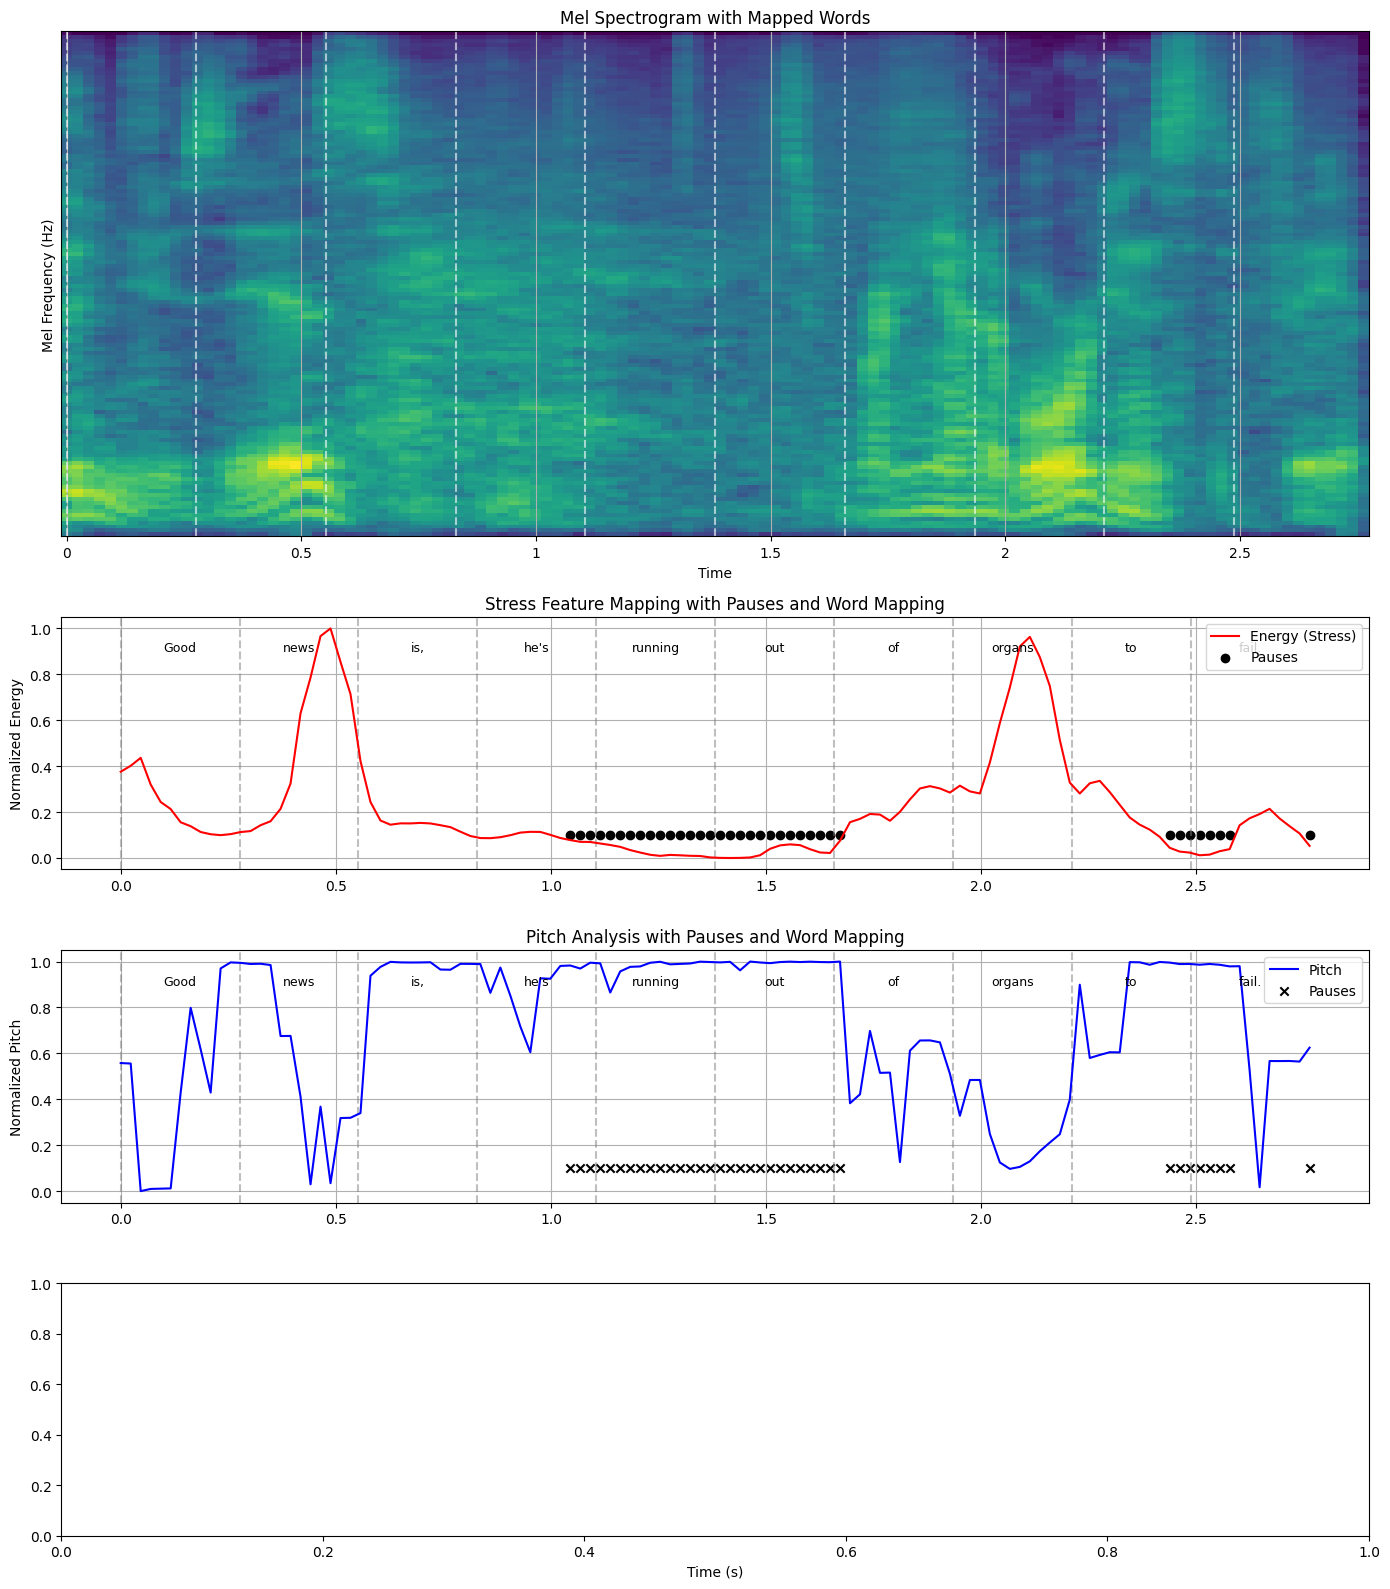

In [60]:
# Import necessary libraries for audio and data analysis
import moviepy.editor as mp
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 1: Extract Audio from Video
video_path = "/content/4_S04E13_032_u.mp4"  # Path to your video file
audio_path = "extracted_audio.wav"  # Path to save the extracted audio

# Load video and extract audio
video = mp.VideoFileClip(video_path)
video.audio.write_audiofile(audio_path)

# Step 2: Load Extracted Audio
# Load the audio using librosa for feature extraction
y, sr_rate = librosa.load(audio_path)

# Step 3: Feature Extraction
# Compute Mel Spectrogram to analyze speech patterns
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr_rate, n_mels=128)
mel_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
time_stamps = librosa.times_like(mel_spectrogram[0], sr=sr_rate)

# Compute energy (RMS) to analyze stress and intensity
energy = librosa.feature.rms(y=y)[0]

# Compute pitch using piptrack for tonal analysis
pitches, magnitudes = librosa.piptrack(y=y, sr=sr_rate)
pitch_values = np.max(pitches, axis=0)

# Step 4: Silence Detection (Pauses)
silence_threshold = np.mean(energy) * 0.5  # Threshold for detecting silence
silent_frames = np.where(energy < silence_threshold)[0]  # Frames with low energy
silence_times = librosa.frames_to_time(silent_frames, sr=sr_rate)

# Step 5: Normalization for Feature Mapping
normalized_energy = (energy - np.min(energy)) / (np.max(energy) - np.min(energy))
normalized_pitch = (pitch_values - np.min(pitch_values)) / (np.max(pitch_values) - np.min(pitch_values))
mel_mean = np.mean(mel_db, axis=0)
normalized_mel = (mel_mean - np.min(mel_mean)) / (np.max(mel_mean) - np.min(mel_mean))

# Step 6: Transcription and Enhanced Word Mapping
transcription = "Good news is, he's running out of organs to fail."  # Provided transcription

# Mapping words to time intervals

def map_words_to_times(transcription, timestamps):
    words = transcription.split()
    actual_duration = timestamps[-1] if len(timestamps) > 0 else 0
    segment_times = np.linspace(0, actual_duration, num=len(words) + 1)
    word_times = [(segment_times[i], segment_times[i + 1], word) for i, word in enumerate(words)]

    # Display word mappings with aural features
    print("\nWord Mappings with Aural Features:")
    for i, (start, end, word) in enumerate(word_times):
        # Energy value during the word's interval
        energy_value = np.mean(normalized_energy[int(start * sr_rate):int(end * sr_rate)])

        # Pitch trend analysis
        pitch_segment = normalized_pitch[int(start * sr_rate):int(end * sr_rate)]
        if len(pitch_segment) >= 2:
            pitch_trend = "increasing" if pitch_segment[-1] > pitch_segment[0] else "decreasing"
        else:
            pitch_trend = "constant"

        # Pause detection
        is_paused = any(start <= t <= end for t in silence_times)

        print(f"{word} ({start:.2f}s - {end:.2f}s): Stress = {energy_value:.2f}, Pitch = {pitch_trend}, Pause = {'Yes' if is_paused else 'No'}")

    return word_times

word_times = map_words_to_times(transcription, time_stamps)

# Step 7: Visualization
fig, ax = plt.subplots(4, 1, figsize=(14, 16), gridspec_kw={'height_ratios': [2, 1, 1, 1]})

# Mel Spectrogram with Word Mapping
librosa.display.specshow(mel_db, x_axis='time', sr=sr_rate, cmap='viridis', ax=ax[0])
ax[0].set_title('Mel Spectrogram with Mapped Words')
ax[0].set_ylabel("Mel Frequency (Hz)")
ax[0].grid(True)

for start, end, word in word_times:
    ax[0].axvline(x=start, color='white', linestyle='--', alpha=0.6)
    ax[0].text((start + end) / 2, mel_db.max() - 10, word, color='white', fontsize=10, ha='center')
    ax[1].axvline(x=start, color='gray', linestyle='--', alpha=0.5)
    ax[1].text((start + end) / 2, 0.9, word, color='black', fontsize=9, ha='center')
    ax[2].axvline(x=start, color='gray', linestyle='--', alpha=0.5)
    ax[2].text((start + end) / 2, 0.9, word, color='black', fontsize=9, ha='center')

# Energy (Stress) with Pauses
ax[1].plot(time_stamps[:len(normalized_energy)], normalized_energy, label="Energy (Stress)", color='red')
ax[1].scatter(silence_times, np.ones_like(silence_times) * 0.1, color='black', marker='o', label='Pauses')
ax[1].set_title("Stress Feature Mapping with Pauses and Word Mapping")
ax[1].set_ylabel("Normalized Energy")
ax[1].legend(loc='upper right')
ax[1].grid(True)

# Pitch Feature with Pauses
ax[2].plot(time_stamps[:len(normalized_pitch)], normalized_pitch, label="Pitch", color='blue')
ax[2].scatter(silence_times, np.ones_like(silence_times) * 0.1, color='black', marker='x', label='Pauses')
ax[2].set_title("Pitch Analysis with Pauses and Word Mapping")
ax[2].set_ylabel("Normalized Pitch")
ax[2].legend(loc='upper right')
ax[2].grid(True)

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()
